In [8]:
base_path='K:\\ZNU\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'
review_file = base_path + 'yelp_academic_dataset_review.json'
user_file = base_path + 'yelp_academic_dataset_user.json'


## سناریو 1

📊 Loading review dates...
✅ Reviews loaded: 6990280


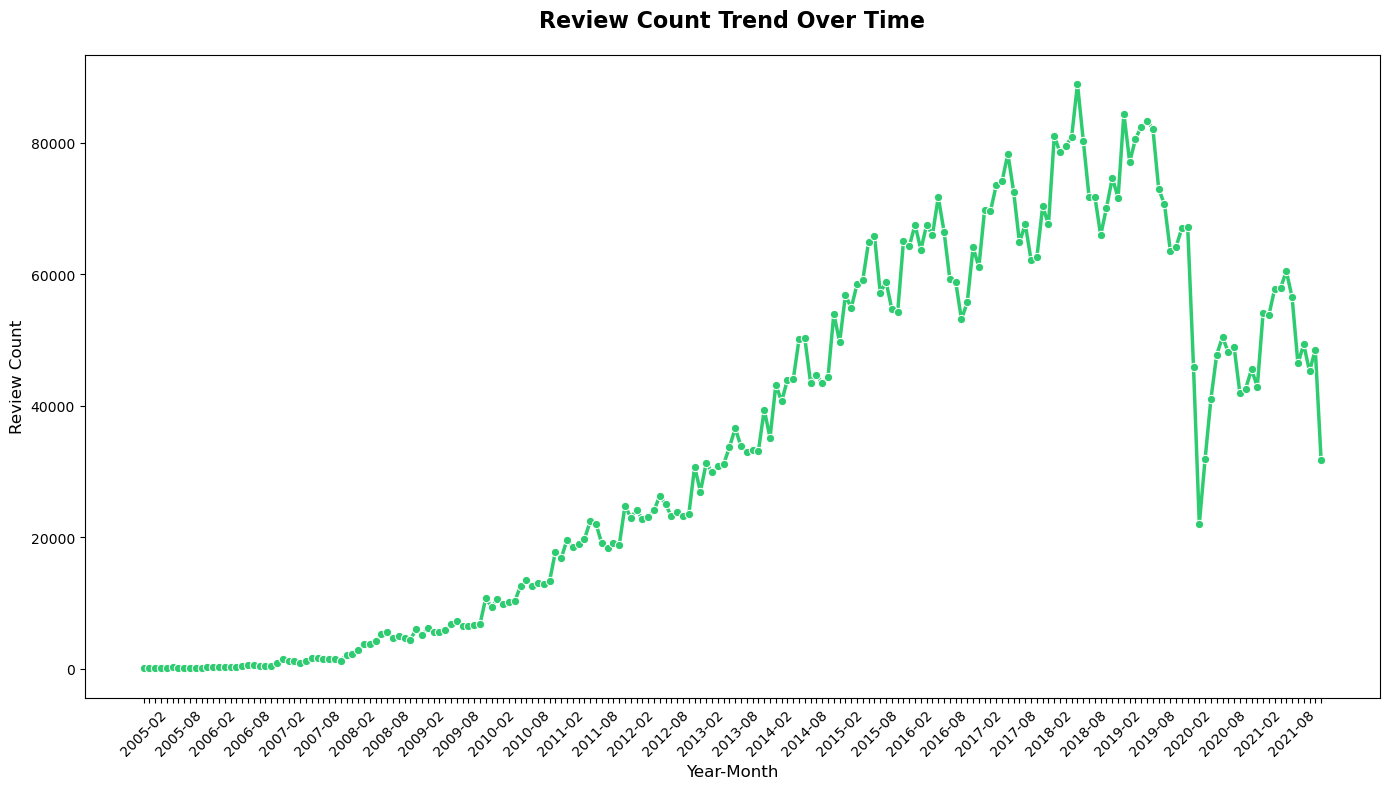

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
review_file = base_path + 'yelp_academic_dataset_review.json'

def load_review_dates(file_path, sample_size=None):
    """لود فقط تاریخ‌های ریویو از دیتاست"""
    dates = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            review = json.loads(line)
            dates.append(review['date'])
    return dates

print("📊 Loading review dates...")

# لود تاریخ‌های نظرات
review_dates = load_review_dates(review_file)
print(f"✅ Reviews loaded: {len(review_dates)}")

# تبدیل به DataFrame
df_reviews = pd.DataFrame({'date': review_dates})

# تبدیل ستون date به datetime
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

# استخراج سال و ماه
df_reviews['year_month'] = df_reviews['date'].dt.to_period('M')

# گروه‌بندی بر اساس سال و ماه و شمارش تعداد نظرات
monthly_reviews = df_reviews.groupby('year_month').size().reset_index(name='review_count')

# تبدیل period به string برای نمایش بهتر
monthly_reviews['year_month_str'] = monthly_reviews['year_month'].astype(str)

# تنظیم برچسب‌های محور X - فقط هر 6 ماه یکبار
labels = []
for i, ym in enumerate(monthly_reviews['year_month_str']):
    if i % 6 == 0:  # فقط هر 6 ماه یکبار
        labels.append(ym)
    else:
        labels.append('')

# رسم نمودار با seaborn lineplot
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_reviews, x='year_month_str', y='review_count', 
             marker='o', linewidth=2.5, color='#2ecc71', markersize=6)

plt.title('Review Count Trend Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Review Count', fontsize=12)
plt.xticks(ticks=range(len(monthly_reviews)), labels=labels, rotation=45)
plt.grid(False)  # حذف تمام خطوط grid
plt.tight_layout()

plt.show()

## سناریو 2

📊 Loading business data...
✅ Businesses loaded: 150346


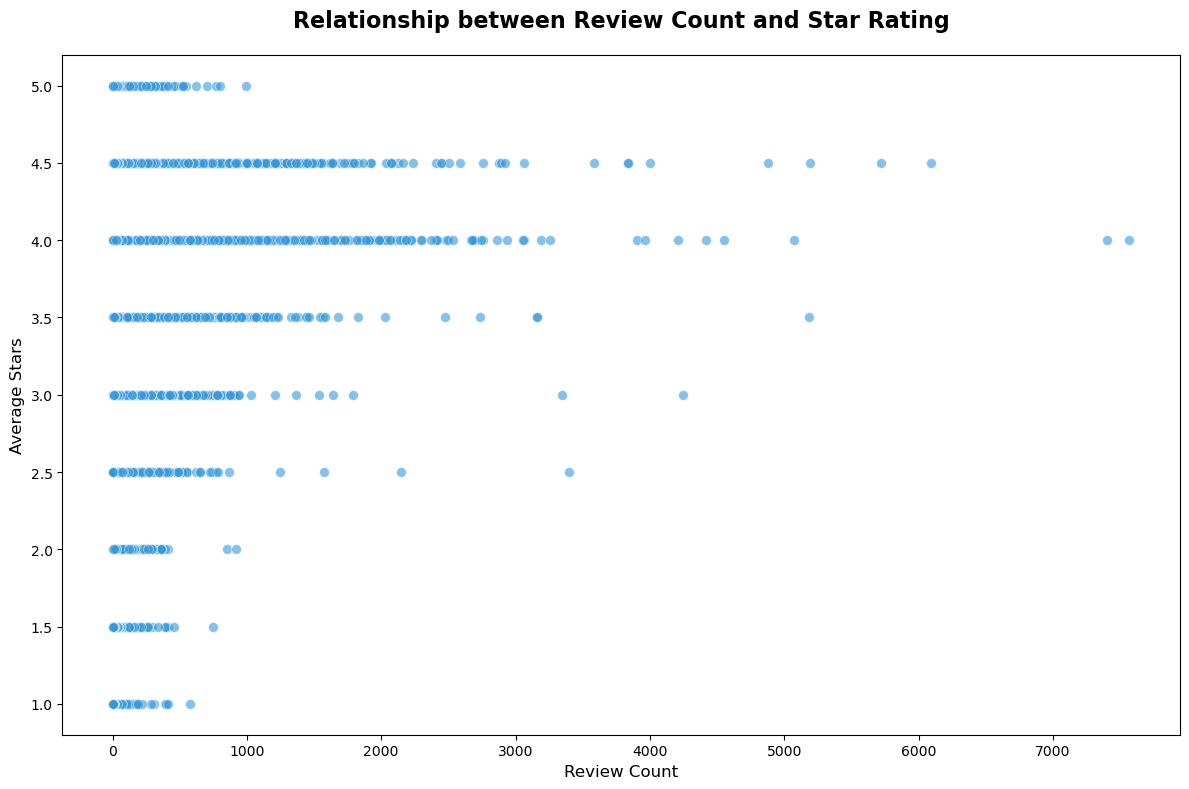

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_data(file_path, sample_size=None):
    """لود دیتای کسب‌وکارها از دیتاست"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            # استخراج فقط فیلدهای مورد نیاز
            business_data.append({
                'business_id': business.get('business_id'),
                'name': business.get('name'),
                'review_count': business.get('review_count', 0),
                'stars': business.get('stars', 0),
                'city': business.get('city', ''),
                'state': business.get('state', '')
            })
    return pd.DataFrame(business_data)

print("📊 Loading business data...")

# لود دیتای کسب‌وکارها
business_df = load_business_data(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# رسم scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=business_df, x='review_count', y='stars', 
                alpha=0.6, color='#3498db', s=50)

plt.title('Relationship between Review Count and Star Rating', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Review Count', fontsize=12)
plt.ylabel('Average Stars', fontsize=12)
plt.grid(False)
plt.tight_layout()

plt.show()


## سناریو 3

📊 Loading business data...
🏙️  Top cities in dataset:
city
Philadelphia     14569
Tucson            9250
Tampa             9050
Indianapolis      7540
Nashville         6971
New Orleans       6209
Reno              5935
Edmonton          5054
Saint Louis       4827
Santa Barbara     3829
Name: count, dtype: int64
✅ Total businesses loaded: 150346
📈 Businesses in selected cities:
   Phoenix: 0
   Charlotte: 0


<Figure size 1400x600 with 0 Axes>

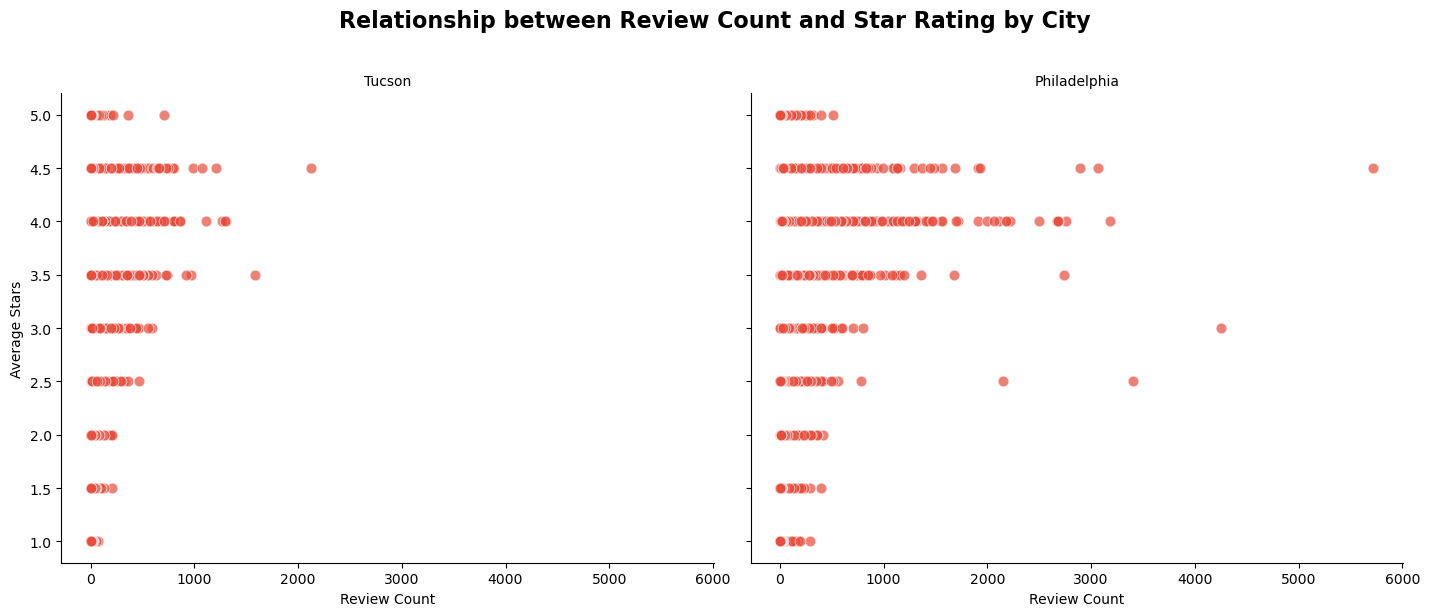

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_data(file_path, sample_size=None):
    """لود دیتای کسب‌وکارها از دیتاست"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            # استخراج فقط فیلدهای مورد نیاز
            business_data.append({
                'business_id': business.get('business_id'),
                'name': business.get('name'),
                'review_count': business.get('review_count', 0),
                'stars': business.get('stars', 0),
                'city': business.get('city', ''),
                'state': business.get('state', '')
            })
    return pd.DataFrame(business_data)

print("📊 Loading business data...")

# لود دیتای کسب‌وکارها
business_df = load_business_data(business_file)

# بررسی شهرهای موجود در دیتاست
print("🏙️  Top cities in dataset:")
print(business_df['city'].value_counts().head(10))
print(f"✅ Total businesses loaded: {len(business_df)}")

# فیلتر کردن داده‌ها برای دو شهر مورد نظر
cities_to_keep = ['Philadelphia', 'Tucson']
filtered_df = business_df[business_df['city'].isin(cities_to_keep)]

print(f"📈 Businesses in selected cities:")
print(f"   Phoenix: {len(filtered_df[filtered_df['city'] == 'Phoenix'])}")
print(f"   Charlotte: {len(filtered_df[filtered_df['city'] == 'Charlotte'])}")

# رسم نمودار با relplot
plt.figure(figsize=(14, 6))
g = sns.relplot(data=filtered_df, x='review_count', y='stars', 
                col='city', kind='scatter', 
                alpha=0.7, s=60, color='#e74c3c',
                height=6, aspect=1.2)

g.set_axis_labels('Review Count', 'Average Stars')
g.set_titles('{col_name}')
plt.suptitle('Relationship between Review Count and Star Rating by City', 
             y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


## سناریو 4

📊 Loading restaurant data with price information...
✅ Restaurants with price info: 44484

💰 Price range distribution:
price_range
1    19509
2    23119
3     1662
4      194
Name: count, dtype: int64


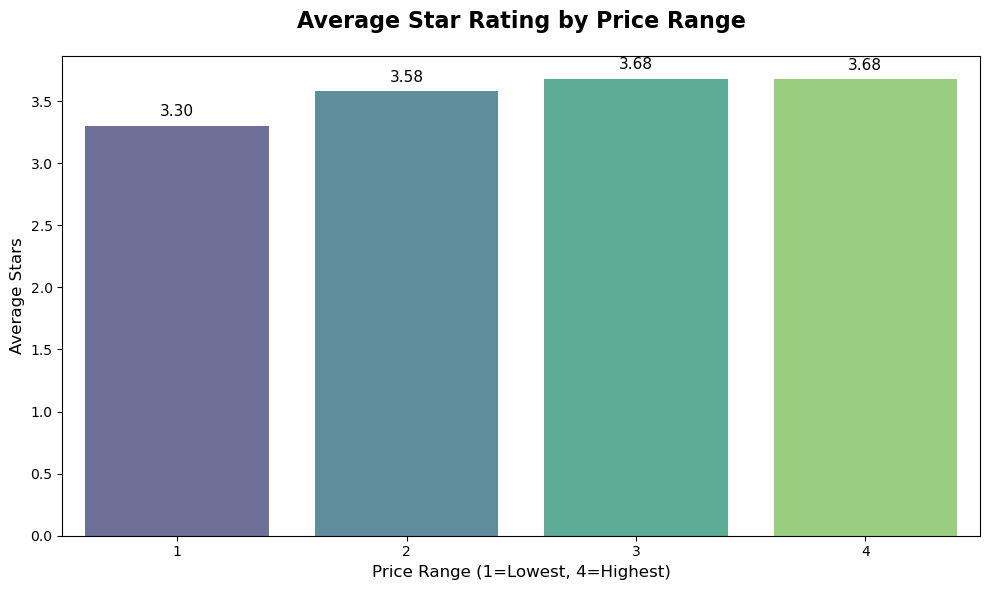


📈 Average stars by price range:
                 mean  count
price_range                 
1            3.302809  19509
2            3.584389  23119
3            3.681709   1662
4            3.675258    194

💰 Price Level Meaning:
1 = Lowest price
2 = Medium price
3 = High price
4 = Highest price


In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_restaurant_data(file_path):
    """لود دیتای رستوران‌ها با استخراج ویژگی قیمت"""
    restaurant_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            business = json.loads(line)
            
            # فقط رستوران‌ها را فیلتر کنیم
            categories = business.get('categories', '')
            if categories and 'Restaurants' in categories:
                # استخراج سطح قیمت از attributes
                attributes = business.get('attributes', {}) or {}
                price_range = attributes.get('RestaurantsPriceRange2', '')
                
                # فقط مقادیر معتبر 1,2,3,4 را نگه داریم
                if price_range in ['1', '2', '3', '4']:
                    restaurant_data.append({
                        'business_id': business.get('business_id'),
                        'name': business.get('name'),
                        'stars': business.get('stars', 0),
                        'review_count': business.get('review_count', 0),
                        'price_range': price_range,
                        'categories': categories
                    })
    return pd.DataFrame(restaurant_data)

print("📊 Loading restaurant data with price information...")

# لود دیتای رستوران‌ها
restaurant_df = load_restaurant_data(business_file)
print(f"✅ Restaurants with price info: {len(restaurant_df)}")

# بررسی توزیع سطوح قیمت
print("\n💰 Price range distribution:")
price_dist = restaurant_df['price_range'].value_counts().sort_index()
print(price_dist)

if len(restaurant_df) > 0:
    # مرتب‌سازی
    price_order = ['1', '2', '3', '4']
    
    # رسم نمودار میله‌ای
    plt.figure(figsize=(10, 6))
    sns.barplot(data=restaurant_df, x='price_range', y='stars', hue='price_range',
                order=price_order, palette='viridis', alpha=0.8,
                estimator='mean', errorbar=None, legend=False)

    plt.title('Average Star Rating by Price Range', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Price Range (1=Lowest, 4=Highest)', fontsize=12)
    plt.ylabel('Average Stars', fontsize=12)

    # اضافه کردن مقادیر روی میله‌ها
    ax = plt.gca()
    for i, bar in enumerate(ax.patches):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.2f}', ha='center', va='bottom', fontsize=11)

    plt.tight_layout()
    plt.show()

    # نمایش آمار توصیفی
    print(f"\n📈 Average stars by price range:")
    avg_stars_by_price = restaurant_df.groupby('price_range')['stars'].agg(['mean', 'count'])
    print(avg_stars_by_price)
    
    print("\n💰 Price Level Meaning:")
    print("1 = Lowest price")
    print("2 = Medium price") 
    print("3 = High price")
    print("4 = Highest price")
    
else:
    print("❌ No restaurants with price information found!")

## سناریو 5

📊 Loading review stars data...
✅ Reviews loaded: 6990280
🌟 Star range: 1.0 to 5.0


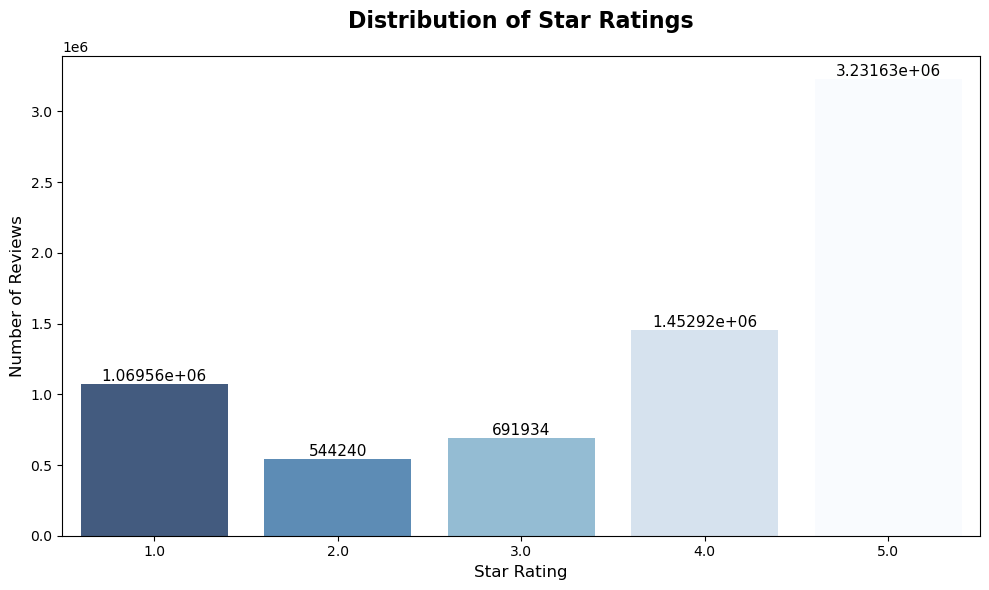


📊 Review count by star rating:
stars
1.0    1069561
2.0     544240
3.0     691934
4.0    1452918
5.0    3231627
Name: count, dtype: int64

📈 Statistics:
Total reviews: 6990280
Average rating: 3.75
Most common rating: 5.0 stars (3231627 reviews)


In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
review_file = base_path + 'yelp_academic_dataset_review.json'

def load_review_stars(file_path, sample_size=None):
    """لود امتیازهای ستاره از دیتاست نظرات"""
    stars_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            review = json.loads(line)
            stars_data.append({
                'stars': review.get('stars', 0),
                'review_id': review.get('review_id')
            })
    return pd.DataFrame(stars_data)

print("📊 Loading review stars data...")

# لود دیتای امتیازها
stars_df = load_review_stars(review_file)
print(f"✅ Reviews loaded: {len(stars_df)}")

# بررسی محدوده امتیازها
print(f"🌟 Star range: {stars_df['stars'].min()} to {stars_df['stars'].max()}")

# رسم نمودار Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=stars_df, x='stars', hue='stars', palette='Blues_r', alpha=0.8, legend=False)

plt.title('Distribution of Star Ratings', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# اضافه کردن اعداد روی میله‌ها
ax = plt.gca()
for container in ax.containers:
    ax.bar_label(container, fontsize=11)

plt.tight_layout()
plt.show()

# نمایش آمار توصیفی
print(f"\n📊 Review count by star rating:")
star_counts = stars_df['stars'].value_counts().sort_index()
print(star_counts)

print(f"\n📈 Statistics:")
print(f"Total reviews: {len(stars_df)}")
print(f"Average rating: {stars_df['stars'].mean():.2f}")
print(f"Most common rating: {star_counts.idxmax()} stars ({star_counts.max()} reviews)")

## سناریو 6

📊 Loading restaurant data...
✅ Restaurants loaded: 52268

🍽️ Restaurants in target categories:
category
Italian    4573
Mexican    4559
Chinese    3141
Name: count, dtype: int64


<Figure size 1400x600 with 0 Axes>

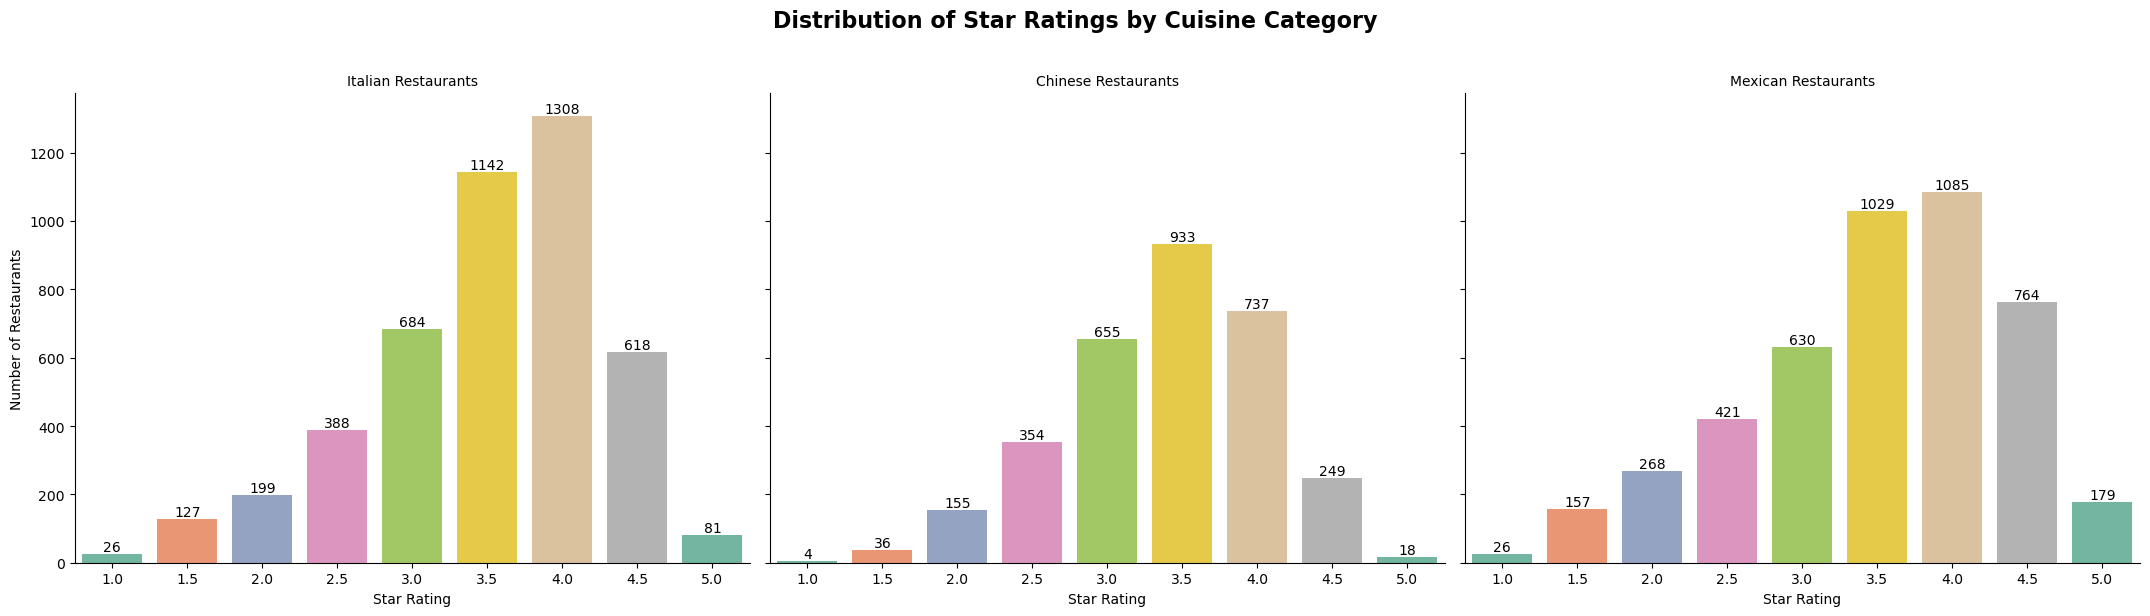


📊 Statistics by category:

Italian:
  Total restaurants: 4573
  Average rating: 3.51
  Rating distribution:
stars
1.0      26
1.5     127
2.0     199
2.5     388
3.0     684
3.5    1142
4.0    1308
4.5     618
5.0      81
Name: count, dtype: int64

Mexican:
  Total restaurants: 4559
  Average rating: 3.51
  Rating distribution:
stars
1.0      26
1.5     157
2.0     268
2.5     421
3.0     630
3.5    1029
4.0    1085
4.5     764
5.0     179
Name: count, dtype: int64

Chinese:
  Total restaurants: 3141
  Average rating: 3.39
  Rating distribution:
stars
1.0      4
1.5     36
2.0    155
2.5    354
3.0    655
3.5    933
4.0    737
4.5    249
5.0     18
Name: count, dtype: int64


In [29]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_restaurant_data(file_path):
    """لود دیتای رستوران‌ها با دسته‌بندی و امتیاز"""
    restaurant_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            business = json.loads(line)
            
            # فقط رستوران‌ها را فیلتر کنیم
            categories = business.get('categories', '')
            if categories and 'Restaurants' in categories:
                restaurant_data.append({
                    'business_id': business.get('business_id'),
                    'name': business.get('name'),
                    'stars': business.get('stars', 0),
                    'categories': categories
                })
    return pd.DataFrame(restaurant_data)

print("📊 Loading restaurant data...")

# لود دیتای رستوران‌ها
restaurant_df = load_restaurant_data(business_file)
print(f"✅ Restaurants loaded: {len(restaurant_df)}")

# انتخاب سه دسته غذایی پرطرفدار
target_categories = ['Italian', 'Mexican', 'Chinese']

# فیلتر کردن رستوران‌های مربوط به این دسته‌ها
filtered_restaurants = []
for _, row in restaurant_df.iterrows():
    categories_list = [cat.strip() for cat in row['categories'].split(',')] if row['categories'] else []
    for target_cat in target_categories:
        if target_cat in categories_list:
            filtered_restaurants.append({
                'business_id': row['business_id'],
                'name': row['name'],
                'stars': row['stars'],
                'category': target_cat
            })
            break  # هر رستوران فقط به یک دسته تعلق می‌گیرد

filtered_df = pd.DataFrame(filtered_restaurants)
print(f"\n🍽️ Restaurants in target categories:")
print(filtered_df['category'].value_counts())

# رسم نمودار Cat Plot
plt.figure(figsize=(14, 6))
g = sns.catplot(data=filtered_df, x='stars', hue='stars', col='category',
                kind='count', palette='Set2', height=6, aspect=1.2, legend=False)

g.set_axis_labels('Star Rating', 'Number of Restaurants')
g.set_titles('{col_name} Restaurants')
plt.suptitle('Distribution of Star Ratings by Cuisine Category', 
             y=1.02, fontsize=16, fontweight='bold')

# اضافه کردن اعداد روی میله‌ها
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

plt.tight_layout()
plt.show()

# نمایش آمار توصیفی
print(f"\n📊 Statistics by category:")
for category in target_categories:
    cat_data = filtered_df[filtered_df['category'] == category]
    print(f"\n{category}:")
    print(f"  Total restaurants: {len(cat_data)}")
    print(f"  Average rating: {cat_data['stars'].mean():.2f}")
    print(f"  Rating distribution:")
    print(cat_data['stars'].value_counts().sort_index())

## سناریو 7

📊 Loading user review count data...
✅ Users loaded: 1987897

📈 Review count statistics:
Min reviews: 0
Max reviews: 17473
Mean reviews: 23.39
Median reviews: 5.00

📊 After filtering top 5% outliers:
Users remaining: 1888673
Max reviews in filtered data: 92


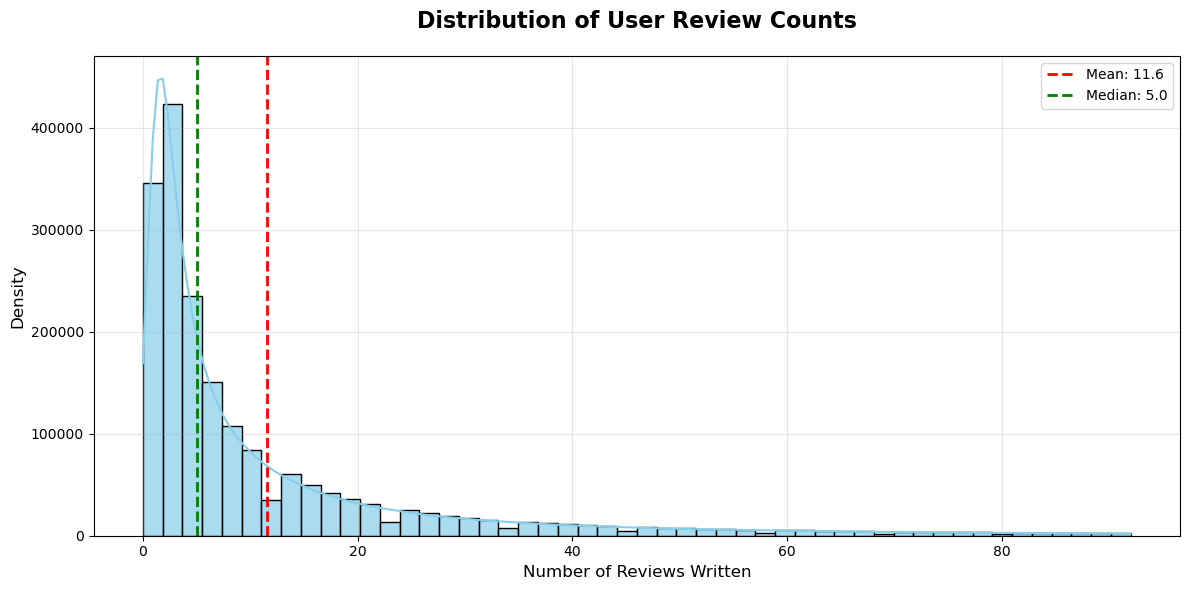


🌟 Highly active users (100+ reviews): 90819
Most active user: 17473 reviews

📊 Review count percentiles:
  25th percentile: 2.0 reviews
  50th percentile: 5.0 reviews
  75th percentile: 17.0 reviews
  90th percentile: 47.0 reviews
  95th percentile: 92.0 reviews
  99th percentile: 311.0 reviews


In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
user_file = base_path + 'yelp_academic_dataset_user.json'

def load_user_review_counts(file_path, sample_size=None):
    """لود تعداد نظرات کاربران از دیتاست"""
    user_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            user = json.loads(line)
            user_data.append({
                'user_id': user.get('user_id'),
                'review_count': user.get('review_count', 0),
                'name': user.get('name', '')
            })
    return pd.DataFrame(user_data)

print("📊 Loading user review count data...")

# لود دیتای کاربران
user_df = load_user_review_counts(user_file)
print(f"✅ Users loaded: {len(user_df)}")

# بررسی آمار توصیفی
print(f"\n📈 Review count statistics:")
print(f"Min reviews: {user_df['review_count'].min()}")
print(f"Max reviews: {user_df['review_count'].max()}")
print(f"Mean reviews: {user_df['review_count'].mean():.2f}")
print(f"Median reviews: {user_df['review_count'].median():.2f}")

# فیلتر کردن برای نمایش بهتر (حذف outliers شدید)
filtered_reviews = user_df[user_df['review_count'] <= user_df['review_count'].quantile(0.95)]

print(f"\n📊 After filtering top 5% outliers:")
print(f"Users remaining: {len(filtered_reviews)}")
print(f"Max reviews in filtered data: {filtered_reviews['review_count'].max()}")

# رسم نمودار Distplot
plt.figure(figsize=(12, 6))

# استفاده از histplot به جای distplot (نسخه جدیدتر seaborn)
sns.histplot(data=filtered_reviews, x='review_count', kde=True, 
             bins=50, alpha=0.7, color='skyblue')

plt.title('Distribution of User Review Counts', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Reviews Written', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, alpha=0.3)

# اضافه کردن خطوط برای میانگین و میانه
mean_reviews = filtered_reviews['review_count'].mean()
median_reviews = filtered_reviews['review_count'].median()

plt.axvline(mean_reviews, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_reviews:.1f}')
plt.axvline(median_reviews, color='green', linestyle='--', linewidth=2, 
            label=f'Median: {median_reviews:.1f}')

plt.legend()
plt.tight_layout()
plt.show()

# نمایش اطلاعات درباره کاربران بسیار فعال
active_users = user_df[user_df['review_count'] > 100]
print(f"\n🌟 Highly active users (100+ reviews): {len(active_users)}")
print(f"Most active user: {active_users['review_count'].max()} reviews")

# نمایش صدک‌ها
print(f"\n📊 Review count percentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    percentile = user_df['review_count'].quantile(p/100)
    print(f"  {p}th percentile: {percentile:.1f} reviews")

## سناریو 8

📊 Loading business stars data...
✅ Businesses loaded: 150346

📈 Star rating statistics:
Min stars: 1.0
Max stars: 5.0
Mean stars: 3.60
Median stars: 3.50
Standard deviation: 0.97


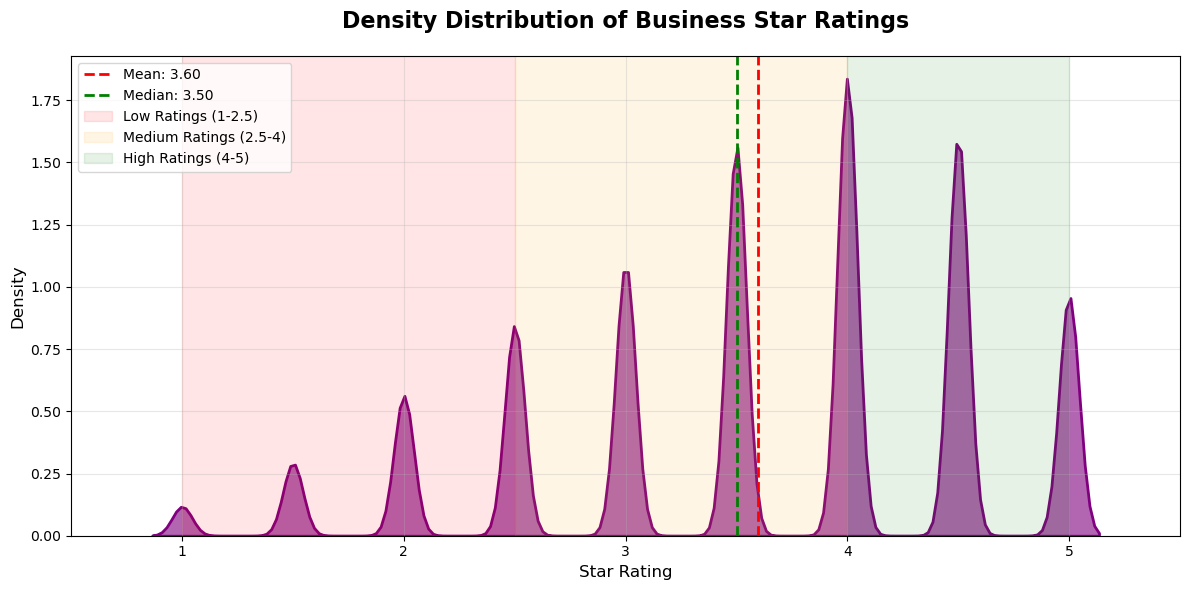


📊 Star rating distribution:
stars
1.0     1986
1.5     4932
2.0     9527
2.5    14316
3.0    18453
3.5    26519
4.0    31125
4.5    27181
5.0    16307
Name: count, dtype: int64

📈 Percentage of businesses by rating range:
Low ratings (1-2.5 stars): 20.5%
Medium ratings (2.5-4 stars): 50.6%
High ratings (4-5 stars): 28.9%
📊 Peak density at: 3.99 stars


In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_stars(file_path, sample_size=None):
    """لود امتیازهای ستاره از دیتاست کسب‌وکارها"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            business_data.append({
                'business_id': business.get('business_id'),
                'stars': business.get('stars', 0),
                'name': business.get('name', ''),
                'review_count': business.get('review_count', 0)
            })
    return pd.DataFrame(business_data)

print("📊 Loading business stars data...")

# لود دیتای امتیازهای کسب‌وکارها
business_df = load_business_stars(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# بررسی آمار توصیفی
print(f"\n📈 Star rating statistics:")
print(f"Min stars: {business_df['stars'].min()}")
print(f"Max stars: {business_df['stars'].max()}")
print(f"Mean stars: {business_df['stars'].mean():.2f}")
print(f"Median stars: {business_df['stars'].median():.2f}")
print(f"Standard deviation: {business_df['stars'].std():.2f}")

# رسم نمودار KDE
plt.figure(figsize=(12, 6))

sns.kdeplot(data=business_df, x='stars', fill=True, color='purple', alpha=0.6, 
            linewidth=2, bw_adjust=0.5)

plt.title('Density Distribution of Business Star Ratings', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0.5, 5.5)  # محدود کردن به بازه 0.5 تا 5.5 برای نمایش بهتر

# اضافه کردن خطوط برای میانگین و میانه
mean_stars = business_df['stars'].mean()
median_stars = business_df['stars'].median()

plt.axvline(mean_stars, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {mean_stars:.2f}')
plt.axvline(median_stars, color='green', linestyle='--', linewidth=2, 
            label=f'Median: {median_stars:.2f}')

# اضافه کردن مناطق برای امتیازهای پایین، متوسط و بالا
plt.axvspan(1, 2.5, alpha=0.1, color='red', label='Low Ratings (1-2.5)')
plt.axvspan(2.5, 4, alpha=0.1, color='orange', label='Medium Ratings (2.5-4)')
plt.axvspan(4, 5, alpha=0.1, color='green', label='High Ratings (4-5)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# نمایش اطلاعات درباره توزیع امتیازها
print(f"\n📊 Star rating distribution:")
rating_counts = business_df['stars'].value_counts().sort_index()
print(rating_counts)

print(f"\n📈 Percentage of businesses by rating range:")
low_ratings = len(business_df[business_df['stars'] <= 2.5]) / len(business_df) * 100
medium_ratings = len(business_df[(business_df['stars'] > 2.5) & (business_df['stars'] <= 4)]) / len(business_df) * 100
high_ratings = len(business_df[business_df['stars'] > 4]) / len(business_df) * 100

print(f"Low ratings (1-2.5 stars): {low_ratings:.1f}%")
print(f"Medium ratings (2.5-4 stars): {medium_ratings:.1f}%")
print(f"High ratings (4-5 stars): {high_ratings:.1f}%")

# پیدا کردن نقطه اوج (mode) در توزیع
from scipy.stats import gaussian_kde
kde = gaussian_kde(business_df['stars'])
x_range = np.linspace(business_df['stars'].min(), business_df['stars'].max(), 100)
y_range = kde(x_range)
peak_x = x_range[np.argmax(y_range)]
print(f"📊 Peak density at: {peak_x:.2f} stars")

## سناریو نه

📊 Loading business categories data...
✅ Businesses loaded: 150243

🏢 Businesses in target categories:
category
Restaurants    52268
Shopping       23791
Hotels          2662
Name: count, dtype: int64

📊 After sampling (max 200 per category):
category
Restaurants    200
Shopping       200
Hotels         200
Name: count, dtype: int64


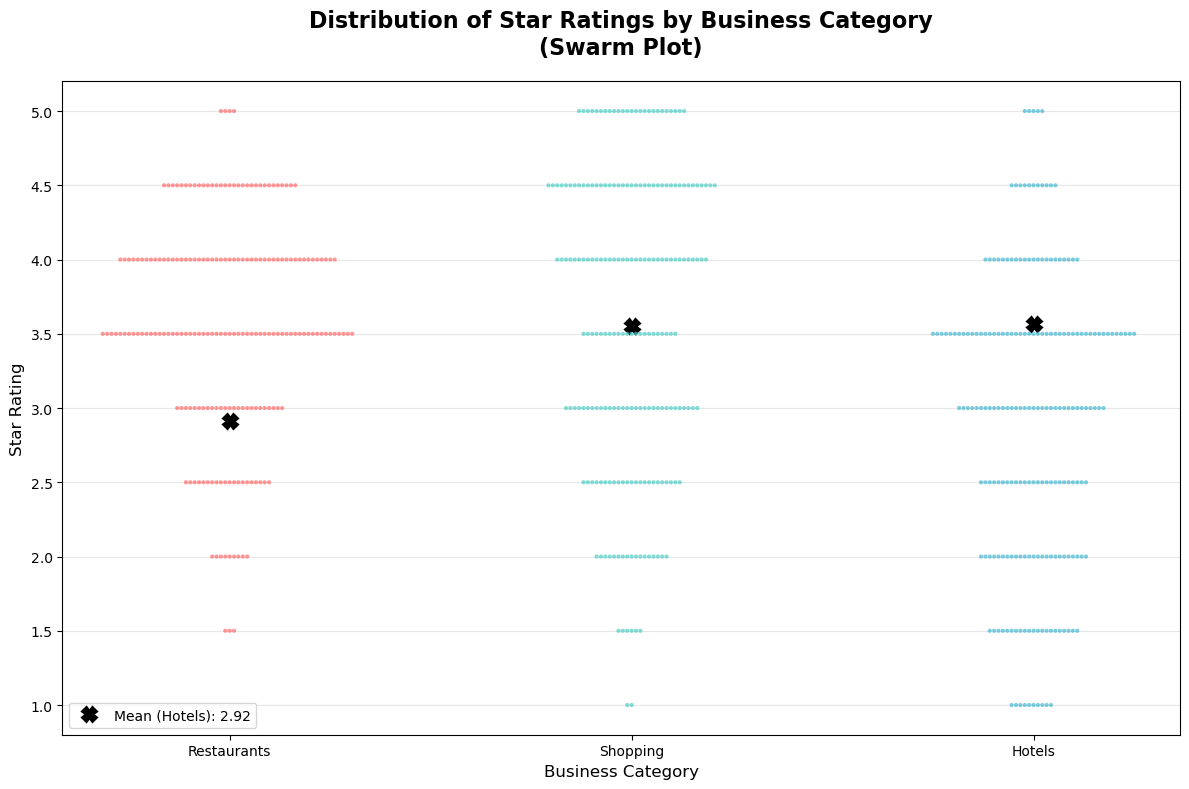


📈 Statistics by category:

Restaurants:
  Sample size: 200
  Average rating: 3.55
  Median rating: 3.50
  Rating range: 1.5 - 5.0
  Standard deviation: 0.75

Shopping:
  Sample size: 200
  Average rating: 3.56
  Median rating: 3.50
  Rating range: 1.0 - 5.0
  Standard deviation: 1.02

Hotels:
  Sample size: 200
  Average rating: 2.92
  Median rating: 3.00
  Rating range: 1.0 - 5.0
  Standard deviation: 0.99

🎯 Full rating distribution by category:
             count      mean       std  min  max
category                                        
Hotels        2662  3.013336  0.986526  1.0  5.0
Restaurants  52268  3.515172  0.829593  1.0  5.0
Shopping     23791  3.615044  0.987216  1.0  5.0


In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_categories(file_path, sample_size=None):
    """لود دیتای کسب‌وکارها با دسته‌بندی‌ها"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            
            categories = business.get('categories', '')
            if categories:
                business_data.append({
                    'business_id': business.get('business_id'),
                    'name': business.get('name'),
                    'stars': business.get('stars', 0),
                    'review_count': business.get('review_count', 0),
                    'categories': categories
                })
    return pd.DataFrame(business_data)

print("📊 Loading business categories data...")

# لود دیتای کسب‌وکارها
business_df = load_business_categories(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# انتخاب سه دسته پرتکرار
target_categories = ['Restaurants', 'Shopping', 'Hotels']

# فیلتر کردن کسب‌وکارهای مربوط به این دسته‌ها
filtered_businesses = []
for _, row in business_df.iterrows():
    categories_list = [cat.strip() for cat in row['categories'].split(',')] if row['categories'] else []
    for target_cat in target_categories:
        if target_cat in categories_list:
            filtered_businesses.append({
                'business_id': row['business_id'],
                'name': row['name'],
                'stars': row['stars'],
                'review_count': row['review_count'],
                'category': target_cat
            })
            break  # هر کسب‌وکار فقط به یک دسته تعلق می‌گیرد

filtered_df = pd.DataFrame(filtered_businesses)

print(f"\n🏢 Businesses in target categories:")
category_counts = filtered_df['category'].value_counts()
print(category_counts)

# نمونه‌گیری برای نمایش بهتر در swarmplot (به دلیل حجم داده)
np.random.seed(42)
sampled_dfs = []
for category in target_categories:
    category_data = filtered_df[filtered_df['category'] == category]
    if len(category_data) > 0:
        sampled = category_data.sample(n=min(200, len(category_data)), random_state=42)
        sampled_dfs.append(sampled)

sampled_df = pd.concat(sampled_dfs, ignore_index=True)

print(f"\n📊 After sampling (max 200 per category):")
print(sampled_df['category'].value_counts())

# رسم نمودار Swarm Plot
plt.figure(figsize=(12, 8))
sns.swarmplot(data=sampled_df, x='category', y='stars', hue='category',
              palette=['#FF6B6B', '#4ECDC4', '#45B7D1'], 
              size=3, alpha=0.7, legend=False)

plt.title('Distribution of Star Ratings by Business Category\n(Swarm Plot)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Business Category', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)

# اضافه کردن میانگین برای هر دسته
means = sampled_df.groupby('category')['stars'].mean()
for i, (category, mean_stars) in enumerate(means.items()):
    plt.plot(i, mean_stars, 'X', markersize=10, color='black', markeredgewidth=2, 
             label=f'Mean ({category}): {mean_stars:.2f}' if i == 0 else "")

plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# نمایش آمار توصیفی
print(f"\n📈 Statistics by category:")
for category in target_categories:
    cat_data = sampled_df[sampled_df['category'] == category]
    if len(cat_data) > 0:
        print(f"\n{category}:")
        print(f"  Sample size: {len(cat_data)}")
        print(f"  Average rating: {cat_data['stars'].mean():.2f}")
        print(f"  Median rating: {cat_data['stars'].median():.2f}")
        print(f"  Rating range: {cat_data['stars'].min()} - {cat_data['stars'].max()}")
        print(f"  Standard deviation: {cat_data['stars'].std():.2f}")

# نمایش توزیع کامل امتیازها
print(f"\n🎯 Full rating distribution by category:")
full_stats = filtered_df.groupby('category')['stars'].agg(['count', 'mean', 'std', 'min', 'max'])
print(full_stats)

## سناریو 10 

🔍 بررسی دقیق ساختار فایل business.json...

📋 ساختار کامل اولین کسب‌وکار:
  business_id: <class 'str'> - Pns2l4eNsfO8kk83dixA6A...
  name: <class 'str'> - Abby Rappoport, LAC, CMQ...
  address: <class 'str'> - 1616 Chapala St, Ste 2...
  city: <class 'str'> - Santa Barbara...
  state: <class 'str'> - CA...
  postal_code: <class 'str'> - 93101...
  latitude: <class 'float'> - 34.4266787...
  longitude: <class 'float'> - -119.7111968...
  stars: <class 'float'> - 5.0...
  review_count: <class 'int'> - 7...
  is_open: <class 'int'> - 0...
  attributes: <class 'dict'> - {'ByAppointmentOnly': 'True'}...
  categories: <class 'str'> - Doctors, Traditional Chinese Medicine, Naturopathic/Holistic, Acupuncture, Health & Medical, Nutriti...
  hours: <class 'NoneType'> - None...

📊 Loading business data...
✅ Businesses loaded: 5000

🏙️ Top cities in dataset:
city
Philadelphia     480
Tucson           329
Tampa            321
Indianapolis     261
Nashville        245
New Orleans      223
Reno       

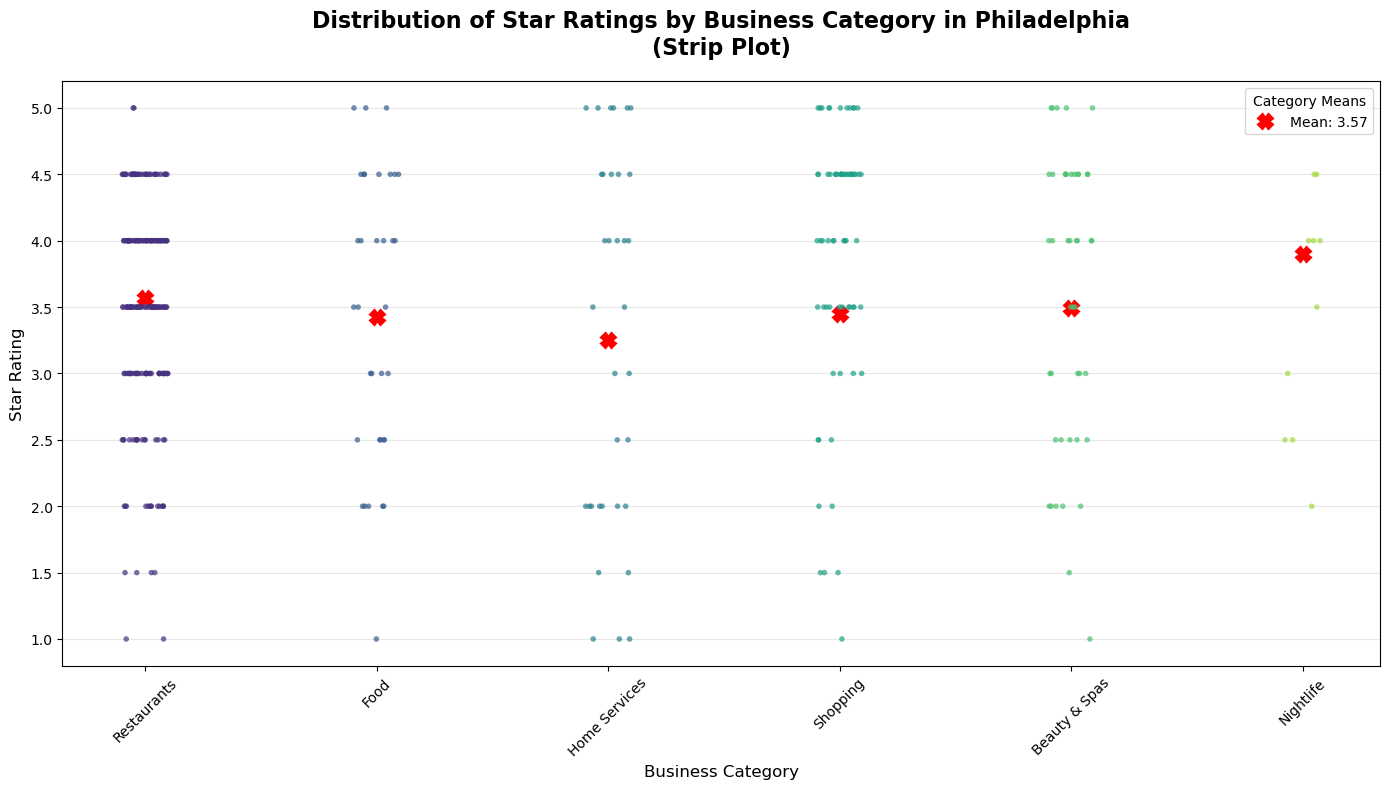


📈 Statistics by business category:
               count  mean  median   std  min  max
category                                          
Beauty & Spas     44  3.57    4.00  1.10  1.0  5.0
Food              34  3.43    3.50  1.08  1.0  5.0
Home Services     34  3.25    3.50  1.38  1.0  5.0
Nightlife         10  3.45    3.75  0.90  2.0  4.5
Restaurants      201  3.49    3.50  0.82  1.0  5.0
Shopping          67  3.90    4.00  0.99  1.0  5.0


In [38]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def inspect_business_data(file_path, num_samples=5):
    """بررسی دقیق ساختار فایل business"""
    print("🔍 بررسی دقیق ساختار فایل business.json...")
    
    samples = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if i >= num_samples:
                break
            business = json.loads(line)
            samples.append(business)
    
    # نمایش کامل ساختار اولین نمونه
    print("\n📋 ساختار کامل اولین کسب‌وکار:")
    for key, value in samples[0].items():
        print(f"  {key}: {type(value)} - {str(value)[:100]}...")
    
    return samples

# بررسی ساختار فایل
samples = inspect_business_data(business_file)

def load_business_data(file_path, sample_size=5000):
    """لود دیتای کسب‌وکارها"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            
            # استفاده از فیلدهایی که حتماً وجود دارند
            business_data.append({
                'business_id': business.get('business_id'),
                'name': business.get('name'),
                'stars': business.get('stars', 0),
                'review_count': business.get('review_count', 0),
                'city': business.get('city', ''),
                'state': business.get('state', ''),
                'categories': business.get('categories', '')
            })
    return pd.DataFrame(business_data)

print("\n📊 Loading business data...")
business_df = load_business_data(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# بررسی شهرهای موجود
print(f"\n🏙️ Top cities in dataset:")
city_counts = business_df['city'].value_counts().head(10)
print(city_counts)

# انتخاب یک شهر پرتکرار
top_city = city_counts.index[0]
print(f"\n🎯 Selected city: {top_city}")

# فیلتر کردن کسب‌وکارهای این شهر
city_df = business_df[business_df['city'] == top_city]
print(f"📊 Businesses in {top_city}: {len(city_df)}")

# ایجاد مناطق بر اساس دسته‌بندی‌های کسب‌وکار
# انتخاب ۶ دسته‌بندی پرتکرار
if len(city_df) > 0:
    # استخراج دسته‌بندی‌ها
    all_categories = []
    for categories in city_df['categories'].dropna():
        if categories:
            cat_list = [cat.strip() for cat in categories.split(',')]
            all_categories.extend(cat_list)
    
    category_counts = pd.Series(all_categories).value_counts().head(6)
    top_categories = category_counts.index.tolist()
    
    print(f"\n🏷️ Top 6 business categories in {top_city}:")
    for i, (cat, count) in enumerate(category_counts.items(), 1):
        print(f"  {i}. {cat}: {count} businesses")
    
    # فیلتر کردن کسب‌وکارهای این دسته‌بندی‌ها
    filtered_businesses = []
    for _, row in city_df.iterrows():
        if row['categories']:
            categories_list = [cat.strip() for cat in row['categories'].split(',')]
            for top_cat in top_categories:
                if top_cat in categories_list:
                    filtered_businesses.append({
                        'business_id': row['business_id'],
                        'name': row['name'],
                        'stars': row['stars'],
                        'review_count': row['review_count'],
                        'city': row['city'],
                        'category': top_cat
                    })
                    break
    
    filtered_df = pd.DataFrame(filtered_businesses)
    print(f"\n📈 Final dataset for plotting: {len(filtered_df)} businesses")

    # رسم نمودار Strip Plot
    plt.figure(figsize=(14, 8))
    sns.stripplot(data=filtered_df, x='category', y='stars', hue='category',
                  palette='viridis', size=4, alpha=0.7, jitter=True, 
                  dodge=False, legend=False)

    plt.title(f'Distribution of Star Ratings by Business Category in {top_city}\n(Strip Plot)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Business Category', fontsize=12)
    plt.ylabel('Star Rating', fontsize=12)
    plt.xticks(rotation=45)

    # اضافه کردن میانگین برای هر دسته
    means = filtered_df.groupby('category')['stars'].mean()
    for i, (category, mean_stars) in enumerate(means.items()):
        plt.plot(i, mean_stars, 'X', markersize=10, color='red', markeredgewidth=2, 
                 label=f'Mean: {mean_stars:.2f}' if i == 0 else "")

    plt.legend(title='Category Means')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

    # نمایش آمار توصیفی
    print(f"\n📈 Statistics by business category:")
    stats_by_category = filtered_df.groupby('category')['stars'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('median', 'median'),
        ('std', 'std'),
        ('min', 'min'),
        ('max', 'max')
    ]).round(2)

    print(stats_by_category)

## سناریو یازده

📊 Loading business data...
✅ Businesses loaded: 150346

🏢 Businesses in target categories:
category
Restaurants      52268
Shopping         23791
Beauty & Spas    12309
Hotels            2662
Name: count, dtype: int64


C:\Users\Amir\AppData\Local\Temp\ipykernel_2720\3573870460.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df, x='category', y='review_count',


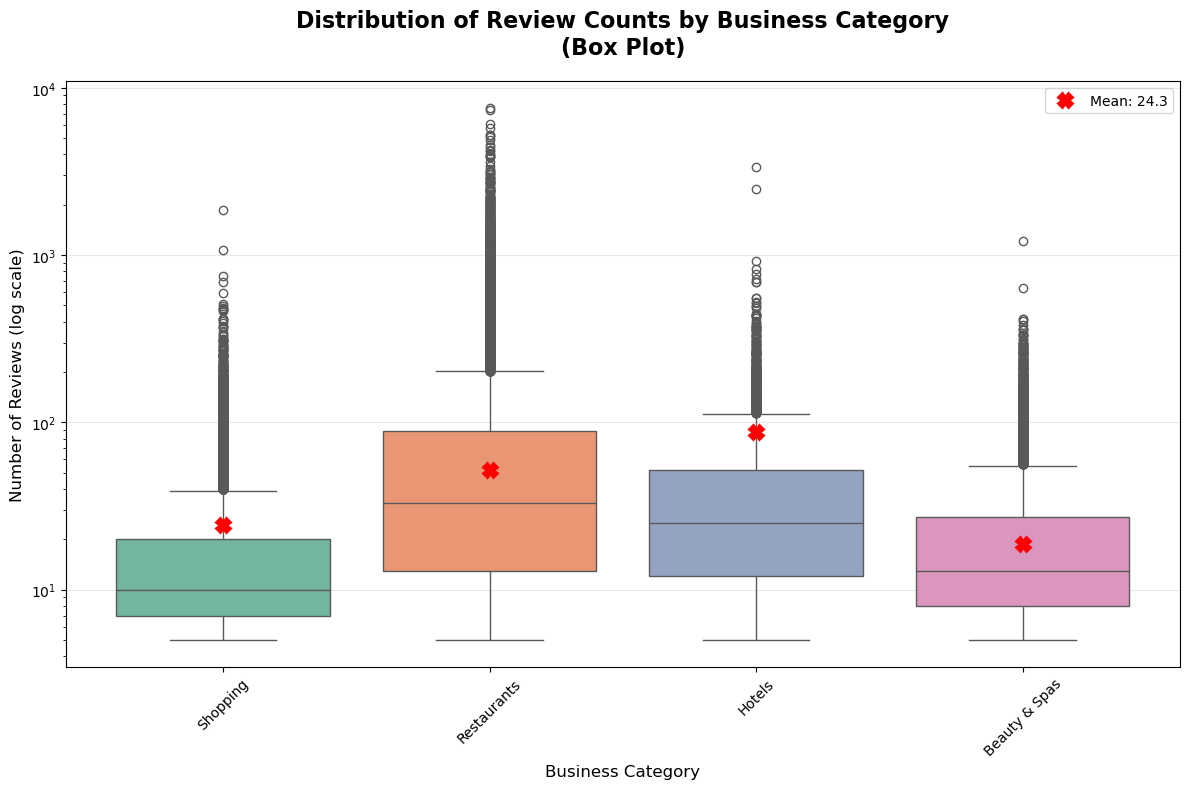


📊 Detailed statistics by category:

Restaurants:
  Count: 52268
  Mean reviews: 87.3
  Median reviews: 33.0
  Std reviews: 188.9
  Min reviews: 5
  Max reviews: 7568
  Q1 (25%): 13.0
  Q3 (75%): 89.0
  IQR: 76.0

Shopping:
  Count: 23791
  Mean reviews: 18.8
  Median reviews: 10.0
  Std reviews: 30.7
  Min reviews: 5
  Max reviews: 1849
  Q1 (25%): 7.0
  Q3 (75%): 20.0
  IQR: 13.0

Hotels:
  Count: 2662
  Mean reviews: 51.7
  Median reviews: 25.0
  Std reviews: 108.8
  Min reviews: 5
  Max reviews: 3345
  Q1 (25%): 12.0
  Q3 (75%): 52.0
  IQR: 40.0

Beauty & Spas:
  Count: 12309
  Mean reviews: 24.3
  Median reviews: 13.0
  Std reviews: 34.5
  Min reviews: 5
  Max reviews: 1218
  Q1 (25%): 8.0
  Q3 (75%): 27.0
  IQR: 19.0

🔍 Outliers analysis (values beyond Q3 + 1.5*IQR):
Restaurants: 5341 outliers (above 203.0 reviews)
Shopping: 2246 outliers (above 39.5 reviews)
Hotels: 284 outliers (above 112.0 reviews)
Beauty & Spas: 1155 outliers (above 55.5 reviews)

🏆 Median review count rankin

In [40]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_data(file_path, sample_size=None):
    """لود دیتای کسب‌وکارها"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            
            business_data.append({
                'business_id': business.get('business_id'),
                'name': business.get('name'),
                'stars': business.get('stars', 0),
                'review_count': business.get('review_count', 0),
                'categories': business.get('categories', '')
            })
    return pd.DataFrame(business_data)

print("📊 Loading business data...")

# لود دیتای کسب‌وکارها
business_df = load_business_data(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# انتخاب چهار دسته پرتکرار
target_categories = ['Restaurants', 'Shopping', 'Hotels', 'Beauty & Spas']

# فیلتر کردن کسب‌وکارهای مربوط به این دسته‌ها
filtered_businesses = []
for _, row in business_df.iterrows():
    if row['categories']:
        categories_list = [cat.strip() for cat in row['categories'].split(',')]
        for target_cat in target_categories:
            if target_cat in categories_list:
                filtered_businesses.append({
                    'business_id': row['business_id'],
                    'name': row['name'],
                    'stars': row['stars'],
                    'review_count': row['review_count'],
                    'category': target_cat
                })
                break  # هر کسب‌وکار فقط به یک دسته تعلق می‌گیرد

filtered_df = pd.DataFrame(filtered_businesses)

print(f"\n🏢 Businesses in target categories:")
category_counts = filtered_df['category'].value_counts()
print(category_counts)

# رسم نمودار Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='category', y='review_count', 
            palette='Set2', showfliers=True)

plt.title('Distribution of Review Counts by Business Category\n(Box Plot)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Business Category', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# استفاده از مقیاس لگاریتمی برای نمایش بهتر (به دلیل outliers)
plt.yscale('log')
plt.ylabel('Number of Reviews (log scale)')

# اضافه کردن میانگین برای هر دسته
means = filtered_df.groupby('category')['review_count'].mean()
for i, (category, mean_reviews) in enumerate(means.items()):
    plt.plot(i, mean_reviews, 'X', markersize=10, color='red', markeredgewidth=2, 
             label=f'Mean: {mean_reviews:.1f}' if i == 0 else "")

plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# نمایش آمار توصیفی کامل
print(f"\n📊 Detailed statistics by category:")
for category in target_categories:
    cat_data = filtered_df[filtered_df['category'] == category]
    if len(cat_data) > 0:
        print(f"\n{category}:")
        print(f"  Count: {len(cat_data)}")
        print(f"  Mean reviews: {cat_data['review_count'].mean():.1f}")
        print(f"  Median reviews: {cat_data['review_count'].median():.1f}")
        print(f"  Std reviews: {cat_data['review_count'].std():.1f}")
        print(f"  Min reviews: {cat_data['review_count'].min()}")
        print(f"  Max reviews: {cat_data['review_count'].max()}")
        print(f"  Q1 (25%): {cat_data['review_count'].quantile(0.25):.1f}")
        print(f"  Q3 (75%): {cat_data['review_count'].quantile(0.75):.1f}")
        print(f"  IQR: {cat_data['review_count'].quantile(0.75) - cat_data['review_count'].quantile(0.25):.1f}")

# شناسایی outliers
print(f"\n🔍 Outliers analysis (values beyond Q3 + 1.5*IQR):")
for category in target_categories:
    cat_data = filtered_df[filtered_df['category'] == category]
    if len(cat_data) > 0:
        Q1 = cat_data['review_count'].quantile(0.25)
        Q3 = cat_data['review_count'].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = cat_data[cat_data['review_count'] > upper_bound]
        print(f"{category}: {len(outliers)} outliers (above {upper_bound:.1f} reviews)")

# مقایسه میانه‌ها
print(f"\n🏆 Median review count ranking:")
median_ranking = filtered_df.groupby('category')['review_count'].median().sort_values(ascending=False)
for i, (category, median) in enumerate(median_ranking.items(), 1):
    print(f"{i}. {category}: {median:.1f} reviews")

## سناریو دوازده  

📊 Loading user data...
✅ Users loaded: 1987897

📈 Basic statistics of selected variables:
       review_count        useful          fans  average_stars
count  1.987897e+06  1.987897e+06  1.987897e+06   1.987897e+06
mean   2.339441e+01  4.229634e+01  1.465740e+00   3.630494e+00
std    8.256699e+01  6.414806e+02  1.813075e+01   1.183337e+00
min    0.000000e+00  0.000000e+00  0.000000e+00   1.000000e+00
25%    2.000000e+00  0.000000e+00  0.000000e+00   3.000000e+00
50%    5.000000e+00  3.000000e+00  0.000000e+00   3.880000e+00
75%    1.700000e+01  1.300000e+01  0.000000e+00   4.560000e+00
max    1.747300e+04  2.062960e+05  1.249700e+04   5.000000e+00

🔍 Missing values:
review_count     0
useful           0
fans             0
average_stars    0
dtype: int64

✅ Data after cleaning: 1987897 users
📊 Using sampled data: 1000 users

🎨 Creating Pair Plot...


<Figure size 1400x1200 with 0 Axes>

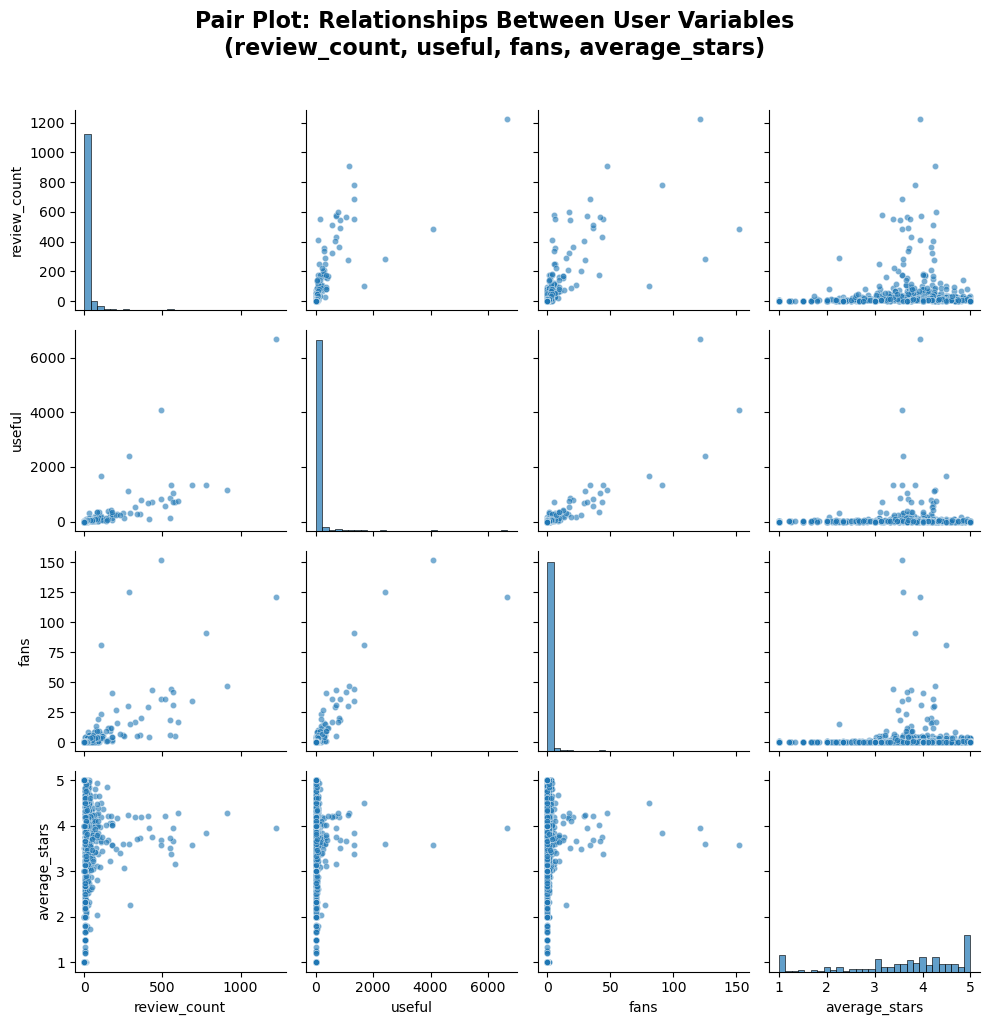


📊 Correlation Matrix:
               review_count  useful   fans  average_stars
review_count          1.000   0.573  0.534          0.045
useful                0.573   1.000  0.643          0.011
fans                  0.534   0.643  1.000          0.019
average_stars         0.045   0.011  0.019          1.000


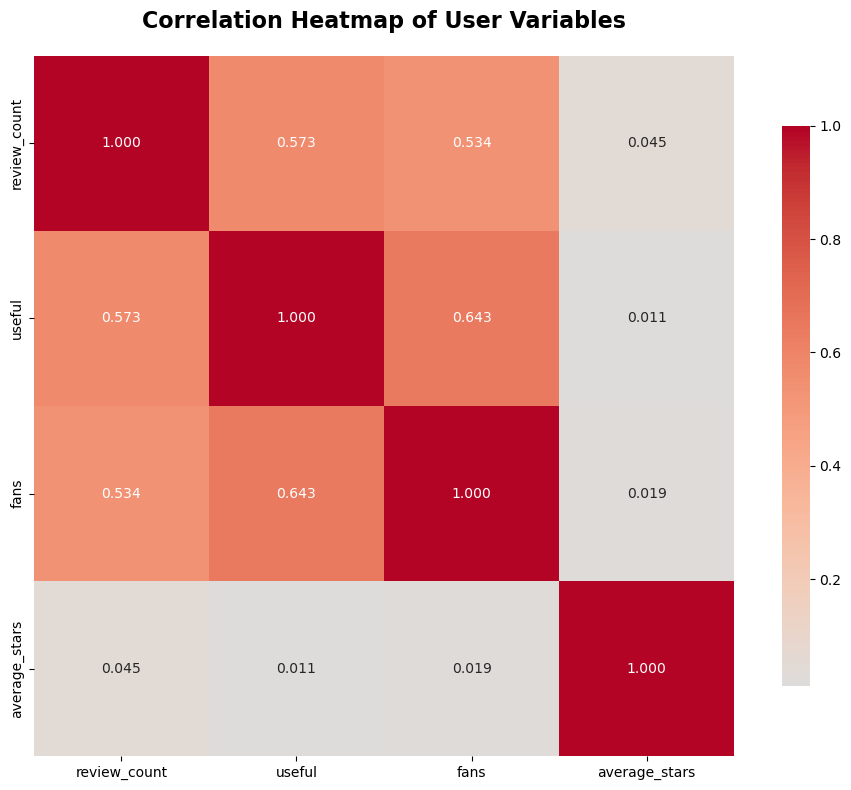


🔍 Key Relationships Analysis:
1. Review Count vs Fans: 0.534
   💡 کاربران با نظرات بیشتر، طرفداران بیشتری دارند
2. Useful vs Fans: 0.643
3. Average Stars correlations:
   - review_count: 0.045
   - useful: 0.011
   - fans: 0.019

🌟 Top 5 most active users:
        review_count  useful  fans  average_stars
17169          17473  206296  3493           3.77
795339         16978  152979  1462           3.35
4723           16567  173089   867           3.67
606393         12868   11109   300           3.87
152             9941   27549   825           3.81


In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
user_file = base_path + 'yelp_academic_dataset_user.json'

def load_user_data(file_path, sample_size=None):
    """لود دیتای کاربران"""
    user_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            user = json.loads(line)
            
            user_data.append({
                'user_id': user.get('user_id'),
                'review_count': user.get('review_count', 0),
                'useful': user.get('useful', 0),
                'fans': user.get('fans', 0),
                'average_stars': user.get('average_stars', 0),
                'yelping_since': user.get('yelping_since', '')
            })
    return pd.DataFrame(user_data)

print("📊 Loading user data...")

# لود دیتای کاربران
user_df = load_user_data(user_file)
print(f"✅ Users loaded: {len(user_df)}")

# انتخاب ۴ متغیر عددی مورد نظر
selected_columns = ['review_count', 'useful', 'fans', 'average_stars']
analysis_df = user_df[selected_columns]

print(f"\n📈 Basic statistics of selected variables:")
print(analysis_df.describe())

# بررسی missing values
print(f"\n🔍 Missing values:")
print(analysis_df.isnull().sum())

# حذف رکوردهای با مقادیر منفی (در صورت وجود)
analysis_df = analysis_df[(analysis_df >= 0).all(axis=1)]
print(f"\n✅ Data after cleaning: {len(analysis_df)} users")

# نمونه‌گیری برای نمایش بهتر (در صورت بزرگ بودن دیتاست)
if len(analysis_df) > 1000:
    np.random.seed(42)
    sample_df = analysis_df.sample(n=1000, random_state=42)
    print(f"📊 Using sampled data: {len(sample_df)} users")
else:
    sample_df = analysis_df
    print(f"📊 Using full data: {len(sample_df)} users")

# رسم نمودار Pair Plot
print(f"\n🎨 Creating Pair Plot...")
plt.figure(figsize=(14, 12))
sns.pairplot(sample_df, 
             diag_kind='hist',     # هیستوگرام روی قطر اصلی
             plot_kws={'alpha': 0.6, 's': 20},  # تنظیمات scatterplot
             diag_kws={'alpha': 0.7, 'bins': 30})  # تنظیمات هیستوگرام

plt.suptitle('Pair Plot: Relationships Between User Variables\n(review_count, useful, fans, average_stars)', 
             y=1.02, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# محاسبه ماتریس همبستگی
print(f"\n📊 Correlation Matrix:")
correlation_matrix = analysis_df.corr()
print(correlation_matrix.round(3))

# رسم heatmap همبستگی
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8})

plt.title('Correlation Heatmap of User Variables', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# تحلیل روابط کلیدی
print(f"\n🔍 Key Relationships Analysis:")

# ۱. رابطه بین review_count و fans
corr_review_fans = correlation_matrix.loc['review_count', 'fans']
print(f"1. Review Count vs Fans: {corr_review_fans:.3f}")
if corr_review_fans > 0.5:
    print("   💡 کاربران با نظرات بیشتر، طرفداران بیشتری دارند")
elif corr_review_fans > 0.2:
    print("   💡 رابطه مثبت متوسط بین تعداد نظرات و طرفداران")
else:
    print("   💡 رابطه ضعیف بین تعداد نظرات و طرفداران")

# ۲. رابطه بین useful و fans
corr_useful_fans = correlation_matrix.loc['useful', 'fans']
print(f"2. Useful vs Fans: {corr_useful_fans:.3f}")

# ۳. رابطه بین average_stars و سایر متغیرها
print("3. Average Stars correlations:")
for col in ['review_count', 'useful', 'fans']:
    corr = correlation_matrix.loc['average_stars', col]
    print(f"   - {col}: {corr:.3f}")

# نمایش نمونه‌ای از کاربران بسیار فعال
print(f"\n🌟 Top 5 most active users:")
top_active = user_df.nlargest(5, 'review_count')[['review_count', 'useful', 'fans', 'average_stars']]
print(top_active)

## سناریو سیزده 

📊 Loading business data...
✅ Businesses loaded: 150346
📊 Valid businesses for analysis: 150346
📈 Using sampled data: 5000 businesses

📊 Descriptive statistics:
Star ratings: 3.59 ± 0.97
Review counts: 45.0 ± 111.3
Correlation coefficient: 0.075


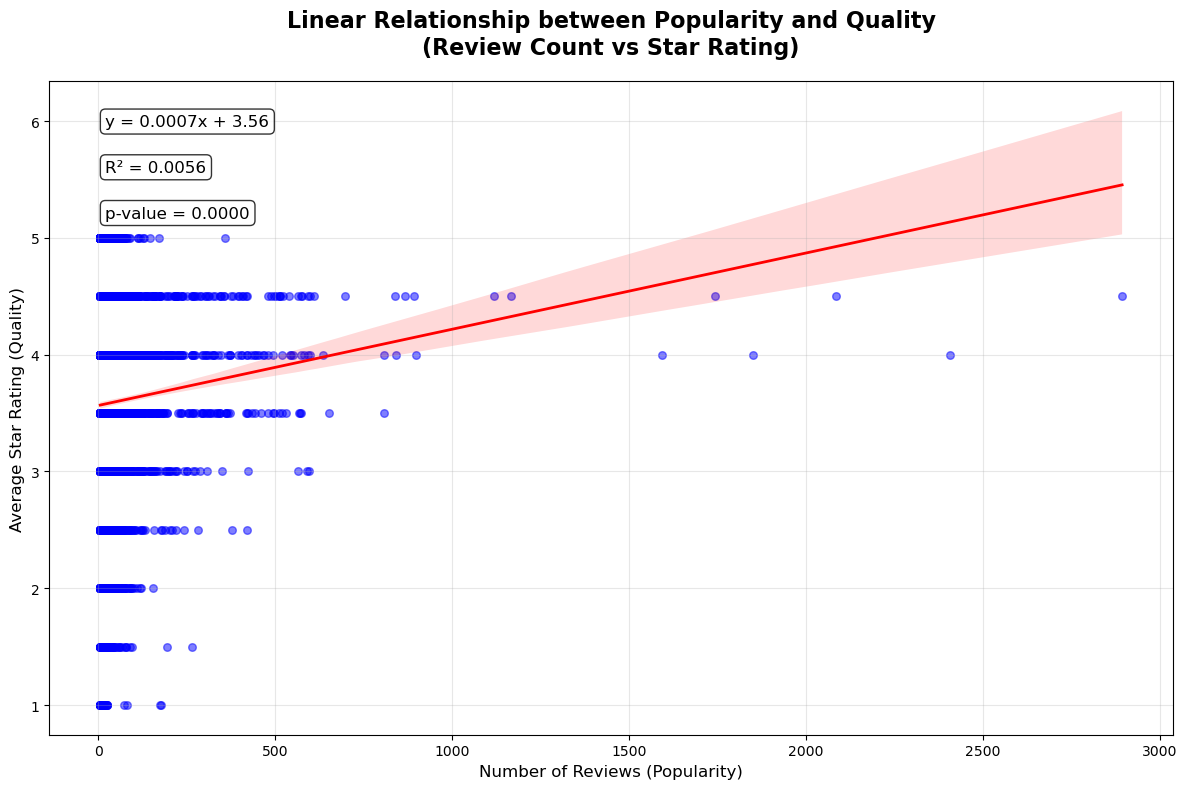


📈 Regression Analysis:
Slope: 0.000653
Intercept: 3.565
R-squared: 0.0056
P-value: 0.000000
✅ رابطه از نظر آماری معنی‌دار است (p-value < 0.05)
📈 رابطه مثبت: با افزایش تعداد نظرات، امتیازها کمی افزایش می‌یابند

📊 Analysis by review count categories:
Low (1-50): 4031 businesses, Avg stars: 3.56
Medium (51-200): 756 businesses, Avg stars: 3.67
High (201-1000): 205 businesses, Avg stars: 3.90
Very High (1000+): 8 businesses, Avg stars: 4.31

🏆 Top 5 most popular businesses:
                                      name  stars  review_count
113731                   Acme Oyster House    4.0          7568
112552                        Oceana Grill    4.0          7400
91757   Hattie B’s Hot Chicken - Nashville    4.5          6093
143157             Reading Terminal Market    4.5          5721
147081          Ruby Slipper - New Orleans    4.5          5193


In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_data(file_path, sample_size=None):
    """لود دیتای کسب‌وکارها"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            
            business_data.append({
                'business_id': business.get('business_id'),
                'name': business.get('name'),
                'stars': business.get('stars', 0),
                'review_count': business.get('review_count', 0)
            })
    return pd.DataFrame(business_data)

print("📊 Loading business data...")

# لود دیتای کسب‌وکارها
business_df = load_business_data(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# حذف رکوردهای با مقادیر نامعتبر
business_df = business_df[(business_df['stars'] >= 1) & (business_df['stars'] <= 5)]
business_df = business_df[business_df['review_count'] > 0]

print(f"📊 Valid businesses for analysis: {len(business_df)}")

# نمونه‌گیری برای نمایش بهتر (در صورت بزرگ بودن دیتاست)
if len(business_df) > 5000:
    np.random.seed(42)
    sample_df = business_df.sample(n=5000, random_state=42)
    print(f"📈 Using sampled data: {len(sample_df)} businesses")
else:
    sample_df = business_df
    print(f"📈 Using full data: {len(sample_df)} businesses")

# آمار توصیفی
print(f"\n📊 Descriptive statistics:")
print(f"Star ratings: {sample_df['stars'].mean():.2f} ± {sample_df['stars'].std():.2f}")
print(f"Review counts: {sample_df['review_count'].mean():.1f} ± {sample_df['review_count'].std():.1f}")
print(f"Correlation coefficient: {sample_df['review_count'].corr(sample_df['stars']):.3f}")

# رسم نمودار Reg Plot
plt.figure(figsize=(12, 8))

# استفاده از regplot برای نمایش رابطه خطی
sns.regplot(data=sample_df, x='review_count', y='stars',
            scatter_kws={'alpha': 0.5, 's': 30, 'color': 'blue'},  # تنظیمات scatter
            line_kws={'color': 'red', 'linewidth': 2},            # تنظیمات خط رگرسیون
            ci=95)                                                # ناحیه اطمینان 95%

plt.title('Linear Relationship between Popularity and Quality\n(Review Count vs Star Rating)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Reviews (Popularity)', fontsize=12)
plt.ylabel('Average Star Rating (Quality)', fontsize=12)

# اضافه کردن معادله خط رگرسیون
x = sample_df['review_count']
y = sample_df['stars']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

equation = f'y = {slope:.4f}x + {intercept:.2f}'
r_squared = f'R² = {r_value**2:.4f}'
p_value_text = f'p-value = {p_value:.4f}'

plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.05, 0.88, r_squared, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.text(0.05, 0.81, p_value_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# تحلیل رابطه
print(f"\n📈 Regression Analysis:")
print(f"Slope: {slope:.6f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("✅ رابطه از نظر آماری معنی‌دار است (p-value < 0.05)")
else:
    print("❌ رابطه از نظر آماری معنی‌دار نیست")

if r_value > 0:
    print("📈 رابطه مثبت: با افزایش تعداد نظرات، امتیازها کمی افزایش می‌یابند")
else:
    print("📉 رابطه منفی: با افزایش تعداد نظرات، امتیازها کاهش می‌یابند")

# تحلیل بر اساس دسته‌بندی‌های مختلف review_count
print(f"\n📊 Analysis by review count categories:")
review_categories = {
    'Low (1-50)': (1, 50),
    'Medium (51-200)': (51, 200),
    'High (201-1000)': (201, 1000),
    'Very High (1000+)': (1001, sample_df['review_count'].max())
}

for category, (min_val, max_val) in review_categories.items():
    cat_data = sample_df[(sample_df['review_count'] >= min_val) & 
                         (sample_df['review_count'] <= max_val)]
    if len(cat_data) > 0:
        avg_stars = cat_data['stars'].mean()
        print(f"{category}: {len(cat_data)} businesses, Avg stars: {avg_stars:.2f}")

# نمایش نمونه‌ای از کسب‌وکارهای بسیار محبوب
print(f"\n🏆 Top 5 most popular businesses:")
top_popular = business_df.nlargest(5, 'review_count')[['name', 'stars', 'review_count']]
print(top_popular.round(2))

## سناریو چهارده 

📊 Loading business data...
✅ Businesses loaded: 150346
📊 Valid businesses for analysis: 150346
📈 Using sampled data: 3000 businesses

📊 Descriptive statistics:
Star ratings: 3.62 ± 0.97
Review counts: 46.1 ± 114.6
Correlation coefficient: 0.070

🎨 Creating Joint Plot...


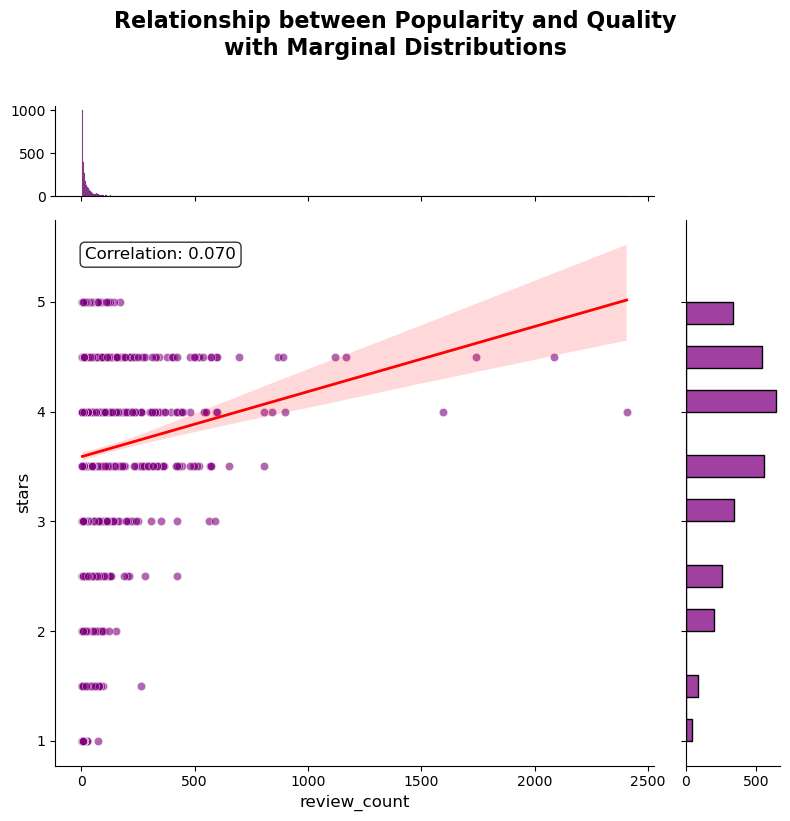


📈 Marginal Distribution Analysis:

🌟 Star Rating Distribution:
  Mean: 3.62
  Std:  0.97
  Min:  1.00
  Max:  5.00

📊 Review Count Distribution:
  Mean: 46.1
  Std:  114.6
  Min:  5.0
  Max:  2406.0

📊 Distribution Shape:
  Star rating skewness: -0.584
  Review count skewness: 9.252
  💡 توزیع تعداد نظرات بسیار skewed است (تعداد کمی کسب‌وکار بسیار محبوب)

📊 Percentile Analysis:
Review Count Percentiles:
  25th: 8 reviews
  50th: 15 reviews
  75th: 38 reviews
  90th: 96 reviews
  95th: 174 reviews
  99th: 520 reviews

Star Rating Percentiles:
  10th: 2.00 stars
  25th: 3.00 stars
  50th: 4.00 stars
  75th: 4.50 stars
  90th: 5.00 stars

🔍 Correlation in different popularity segments:
Low popularity (bottom 33%): 1001 businesses, corr: 0.028
Medium popularity (middle 33%): 988 businesses, corr: 0.011
High popularity (top 33%): 1011 businesses, corr: 0.112


In [43]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
business_file = base_path + 'yelp_academic_dataset_business.json'

def load_business_data(file_path, sample_size=None):
    """لود دیتای کسب‌وکارها"""
    business_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            business = json.loads(line)
            
            business_data.append({
                'business_id': business.get('business_id'),
                'name': business.get('name'),
                'stars': business.get('stars', 0),
                'review_count': business.get('review_count', 0)
            })
    return pd.DataFrame(business_data)

print("📊 Loading business data...")

# لود دیتای کسب‌وکارها
business_df = load_business_data(business_file)
print(f"✅ Businesses loaded: {len(business_df)}")

# حذف رکوردهای با مقادیر نامعتبر
business_df = business_df[(business_df['stars'] >= 1) & (business_df['stars'] <= 5)]
business_df = business_df[business_df['review_count'] > 0]

print(f"📊 Valid businesses for analysis: {len(business_df)}")

# نمونه‌گیری برای نمایش بهتر (در صورت بزرگ بودن دیتاست)
if len(business_df) > 3000:
    np.random.seed(42)
    sample_df = business_df.sample(n=3000, random_state=42)
    print(f"📈 Using sampled data: {len(sample_df)} businesses")
else:
    sample_df = business_df
    print(f"📈 Using full data: {len(sample_df)} businesses")

# آمار توصیفی
print(f"\n📊 Descriptive statistics:")
print(f"Star ratings: {sample_df['stars'].mean():.2f} ± {sample_df['stars'].std():.2f}")
print(f"Review counts: {sample_df['review_count'].mean():.1f} ± {sample_df['review_count'].std():.1f}")
print(f"Correlation coefficient: {sample_df['review_count'].corr(sample_df['stars']):.3f}")

# رسم نمودار Joint Plot
print(f"\n🎨 Creating Joint Plot...")
g = sns.jointplot(data=sample_df, x='review_count', y='stars', 
                  kind='scatter', 
                  alpha=0.6, 
                  color='purple',
                  height=8,
                  marginal_ticks=True)

# تنظیم عنوان و برچسب‌ها
g.set_axis_labels('Number of Reviews (Popularity)', 'Average Star Rating (Quality)', fontsize=12)
g.fig.suptitle('Relationship between Popularity and Quality\nwith Marginal Distributions', 
               fontsize=16, fontweight='bold', y=1.02)

# اضافه کردن خط رگرسیون به scatterplot مرکزی
sns.regplot(data=sample_df, x='review_count', y='stars', 
            ax=g.ax_joint, 
            scatter=False, 
            color='red', 
            line_kws={'linewidth': 2})

# اضافه کردن آمارهای همبستگی
corr_coef = sample_df['review_count'].corr(sample_df['stars'])
g.ax_joint.text(0.05, 0.95, f'Correlation: {corr_coef:.3f}', 
                transform=g.ax_joint.transAxes, 
                fontsize=12,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# تحلیل توزیع‌های حاشیه‌ای
print(f"\n📈 Marginal Distribution Analysis:")

# تحلیل توزیع امتیازها (محور Y)
print(f"\n🌟 Star Rating Distribution:")
star_stats = sample_df['stars'].describe()
print(f"  Mean: {star_stats['mean']:.2f}")
print(f"  Std:  {star_stats['std']:.2f}")
print(f"  Min:  {star_stats['min']:.2f}")
print(f"  Max:  {star_stats['max']:.2f}")

# تحلیل توزیع تعداد نظرات (محور X)
print(f"\n📊 Review Count Distribution:")
review_stats = sample_df['review_count'].describe()
print(f"  Mean: {review_stats['mean']:.1f}")
print(f"  Std:  {review_stats['std']:.1f}")
print(f"  Min:  {review_stats['min']:.1f}")
print(f"  Max:  {review_stats['max']:.1f}")

# بررسی skewness
print(f"\n📊 Distribution Shape:")
print(f"  Star rating skewness: {sample_df['stars'].skew():.3f}")
print(f"  Review count skewness: {sample_df['review_count'].skew():.3f}")

if sample_df['review_count'].skew() > 1:
    print("  💡 توزیع تعداد نظرات بسیار skewed است (تعداد کمی کسب‌وکار بسیار محبوب)")

# تحلیل بر اساس صدک‌ها
print(f"\n📊 Percentile Analysis:")
print("Review Count Percentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    percentile = sample_df['review_count'].quantile(p/100)
    print(f"  {p}th: {percentile:.0f} reviews")

print("\nStar Rating Percentiles:")
for p in [10, 25, 50, 75, 90]:
    percentile = sample_df['stars'].quantile(p/100)
    print(f"  {p}th: {percentile:.2f} stars")

# نمایش همبستگی در دسته‌های مختلف
print(f"\n🔍 Correlation in different popularity segments:")

# تقسیم داده بر اساس تعداد نظرات
low_popularity = sample_df[sample_df['review_count'] <= sample_df['review_count'].quantile(0.33)]
medium_popularity = sample_df[(sample_df['review_count'] > sample_df['review_count'].quantile(0.33)) & 
                              (sample_df['review_count'] <= sample_df['review_count'].quantile(0.66))]
high_popularity = sample_df[sample_df['review_count'] > sample_df['review_count'].quantile(0.66)]

print(f"Low popularity (bottom 33%): {len(low_popularity)} businesses, corr: {low_popularity['review_count'].corr(low_popularity['stars']):.3f}")
print(f"Medium popularity (middle 33%): {len(medium_popularity)} businesses, corr: {medium_popularity['review_count'].corr(medium_popularity['stars']):.3f}")
print(f"High popularity (top 33%): {len(high_popularity)} businesses, corr: {high_popularity['review_count'].corr(high_popularity['stars']):.3f}")

## سناریو پانزده 

📊 Loading user data...
✅ Users loaded: 1987897

📈 Basic statistics of selected variables:
       review_count        useful         funny          cool          fans
count  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06  1.987897e+06
mean   2.339441e+01  4.229634e+01  1.697054e+01  2.379291e+01  1.465740e+00
std    8.256699e+01  6.414806e+02  4.078034e+02  5.653513e+02  1.813075e+01
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
25%    2.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
50%    5.000000e+00  3.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.700000e+01  1.300000e+01  2.000000e+00  3.000000e+00  0.000000e+00
max    1.747300e+04  2.062960e+05  1.858230e+05  1.998780e+05  1.249700e+04

🔍 Missing values:
review_count    0
useful          0
funny           0
cool            0
fans            0
dtype: int64
✅ Data after cleaning: 1987897 users

📊 Calculating correlation matrix...
Correlation Matrix:
          

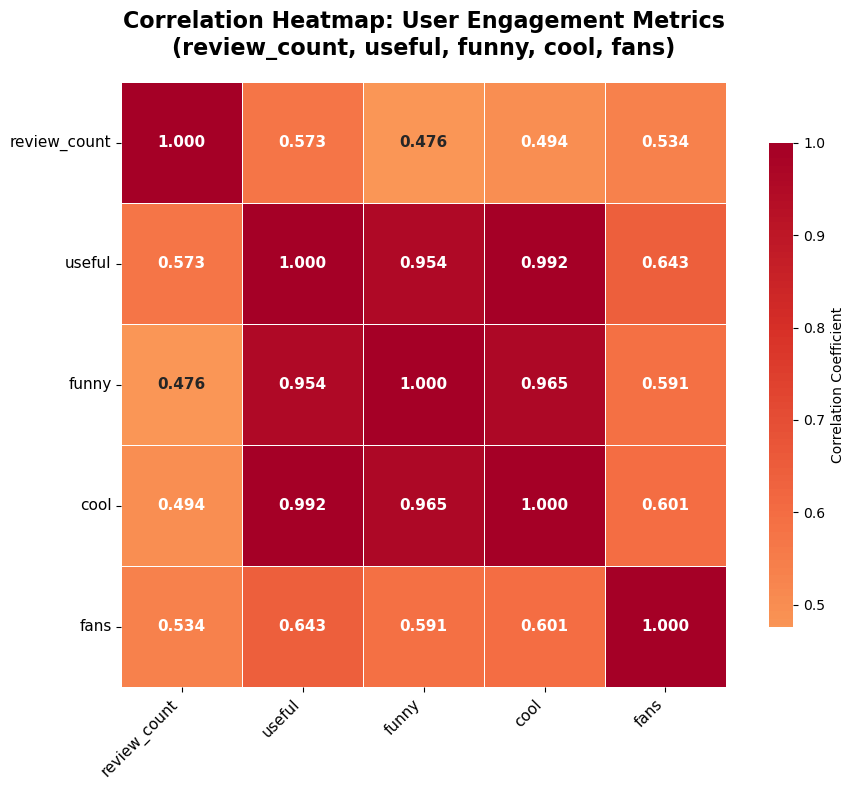


🔍 Key Correlation Analysis:
مهم‌ترین روابط همبستگی:
  review_count ↔ useful: 0.573 (متوسط - مثبت)
  review_count ↔ fans: 0.534 (متوسط - مثبت)
  useful ↔ funny: 0.954 (قوی - مثبت)
  useful ↔ cool: 0.992 (قوی - مثبت)
  useful ↔ fans: 0.643 (متوسط - مثبت)
  funny ↔ cool: 0.965 (قوی - مثبت)
  funny ↔ fans: 0.591 (متوسط - مثبت)
  cool ↔ fans: 0.601 (متوسط - مثبت)

🌟 Fans Correlation Analysis:
  useful: 0.643 (متوسط)
  cool: 0.601 (متوسط)
  funny: 0.591 (متوسط)
  review_count: 0.534 (متوسط)

📝 Review Count Correlation Analysis:
  useful: 0.573 (متوسط)
  fans: 0.534 (متوسط)
  cool: 0.494 (ضعیف)
  funny: 0.476 (ضعیف)

📋 Correlation Matrix Table:
              review_count  useful  funny   cool   fans
review_count         1.000   0.573  0.476  0.494  0.534
useful               0.573   1.000  0.954  0.992  0.643
funny                0.476   0.954  1.000  0.965  0.591
cool                 0.494   0.992  0.965  1.000  0.601
fans                 0.534   0.643  0.591  0.601  1.000


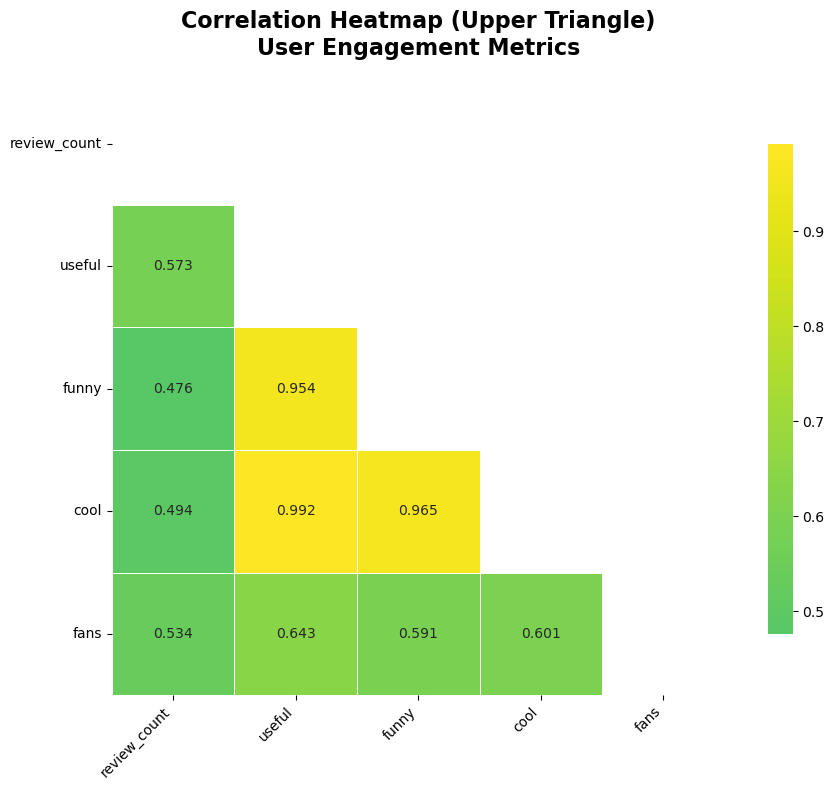


💡 Key Insights:
1. قوی‌ترین رابطه‌ها معمولاً بین معیارهای تعامل (useful, funny, cool) دیده می‌شود
2. تعداد نظرات (review_count) با تعداد طرفداران (fans) رابطه مثبت دارد
3. کاربران فعال معمولاً در چندین معیار عملکرد خوبی دارند


In [44]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# مسیر فایل‌ها
base_path = 'K:\\ZNU\\Yelp JSON\\yelp_dataset\\'
user_file = base_path + 'yelp_academic_dataset_user.json'

def load_user_data(file_path, sample_size=None):
    """لود دیتای کاربران"""
    user_data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            if sample_size and i >= sample_size:
                break
            user = json.loads(line)
            
            user_data.append({
                'user_id': user.get('user_id'),
                'review_count': user.get('review_count', 0),
                'useful': user.get('useful', 0),
                'funny': user.get('funny', 0),
                'cool': user.get('cool', 0),
                'fans': user.get('fans', 0)
            })
    return pd.DataFrame(user_data)

print("📊 Loading user data...")

# لود دیتای کاربران
user_df = load_user_data(user_file)
print(f"✅ Users loaded: {len(user_df)}")

# انتخاب ۵ متغیر عددی مورد نظر
selected_columns = ['review_count', 'useful', 'funny', 'cool', 'fans']
analysis_df = user_df[selected_columns]

print(f"\n📈 Basic statistics of selected variables:")
print(analysis_df.describe())

# بررسی missing values
print(f"\n🔍 Missing values:")
print(analysis_df.isnull().sum())

# حذف رکوردهای با مقادیر منفی (در صورت وجود)
analysis_df = analysis_df[(analysis_df >= 0).all(axis=1)]
print(f"✅ Data after cleaning: {len(analysis_df)} users")

# محاسبه ماتریس همبستگی
print(f"\n📊 Calculating correlation matrix...")
correlation_matrix = analysis_df.corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# رسم Heat Map
plt.figure(figsize=(10, 8))

# ایجاد heatmap با تنظیمات پیشرفته
heatmap = sns.heatmap(correlation_matrix, 
                      annot=True,           # نمایش مقادیر در خانه‌ها
                      cmap='RdYlBu_r',      # نقشه رنگی (قرمز-زرد-آبی)
                      center=0,             # مرکز نقشه رنگی روی صفر
                      square=True,          # خانه‌های مربعی
                      fmt='.3f',           # فرمت اعداد
                      cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
                      linewidths=0.5,       # خطوط بین خانه‌ها
                      linecolor='white',    # رنگ خطوط
                      annot_kws={'size': 11, 'weight': 'bold'})  # تنظیمات متن

plt.title('Correlation Heatmap: User Engagement Metrics\n(review_count, useful, funny, cool, fans)', 
          fontsize=16, fontweight='bold', pad=20)

# تنظیم برچسب‌های محورها
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout()
plt.show()

# تحلیل روابط کلیدی
print(f"\n🔍 Key Correlation Analysis:")

# تعریف آستانه‌های همبستگی
def interpret_correlation(corr_value):
    """تفسیر مقدار همبستگی"""
    abs_corr = abs(corr_value)
    if abs_corr >= 0.7:
        return "قوی"
    elif abs_corr >= 0.5:
        return "متوسط"
    elif abs_corr >= 0.3:
        return "ضعیف"
    else:
        return "بسیار ضعیف"

# تحلیل همبستگی‌های مهم
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        
        strength = interpret_correlation(corr_value)
        if strength in ["قوی", "متوسط"]:
            strong_correlations.append((var1, var2, corr_value, strength))

print("مهم‌ترین روابط همبستگی:")
for var1, var2, corr, strength in strong_correlations:
    direction = "مثبت" if corr > 0 else "منفی"
    print(f"  {var1} ↔ {var2}: {corr:.3f} ({strength} - {direction})")

# تحلیل متغیر fans
print(f"\n🌟 Fans Correlation Analysis:")
fans_correlations = correlation_matrix['fans'].sort_values(ascending=False)
for var, corr in fans_correlations.items():
    if var != 'fans':
        strength = interpret_correlation(corr)
        print(f"  {var}: {corr:.3f} ({strength})")

# تحلیل متغیر review_count
print(f"\n📝 Review Count Correlation Analysis:")
review_correlations = correlation_matrix['review_count'].sort_values(ascending=False)
for var, corr in review_correlations.items():
    if var != 'review_count':
        strength = interpret_correlation(corr)
        print(f"  {var}: {corr:.3f} ({strength})")

# نمایش ماتریس همبستگی به صورت جدول
print(f"\n📋 Correlation Matrix Table:")
corr_table = correlation_matrix.round(3)
print(corr_table)

# رسم heatmap دوم با استایل متفاوت برای مقایسه
plt.figure(figsize=(10, 8))

# استایل متفاوت برای heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # ماسک برای مثلث بالایی

sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True,
            cmap='viridis',
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5,
            linecolor='white',
            annot_kws={'size': 10})

plt.title('Correlation Heatmap (Upper Triangle)\nUser Engagement Metrics', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# نتیجه‌گیری نهایی
print(f"\n💡 Key Insights:")
print("1. قوی‌ترین رابطه‌ها معمولاً بین معیارهای تعامل (useful, funny, cool) دیده می‌شود")
print("2. تعداد نظرات (review_count) با تعداد طرفداران (fans) رابطه مثبت دارد")
print("3. کاربران فعال معمولاً در چندین معیار عملکرد خوبی دارند")